In [83]:
# Loading the packages
if(!require("caret")){install.packages("caret")}
if(!require("tidyverse")){install.packages("tidyverse")}
if(!require("ISLR")){install.packages("ISLR")}
if(!require("boot")){install.packages("boot")}
if(!require("MASS")){ install.packages("MASS")}
if(!require("leaps")){ install.packages("leaps")}
if(!require("glmnet")){ install.packages("glmnet")}
if(!require("e1071")){ install.packages("e1071")}
if(!require("pROC")){ install.packages("pROC")}
if(!require("class")){ install.packages("class")}
if(!require("reshape2")){ install.packages("reshape2")}
library(boot)
library(caret)  # Package for machine learning modelling functions.
library(tidyverse)
library(ISLR)
library(MASS)
library(leaps)
library(glmnet)
library(e1071) # If you face an issue on mac for installing this package use https://wlu.syzygy.ca platform for practice
library(pROC)
library(class)
library(reshape2)

In [84]:
if(!require("lmvar")) {install.packages("lmvar")}
if(!require("splines")) {install.packages("splines")}
if(!require("gam")){install.packages("gam")}
if(!require("rpart")) {install.packages("rpart")}
if(!require("rpart.plot")) {install.packages("rpart.plot")}
if(!require("randomForest")) {install.packages("randomForest")}
if(!require("gbm")) {install.packages("gbm")}
library(lmvar)
library(splines)
library(gam)
library(rpart)
library(rpart.plot)
library(randomForest)
library(gbm)
if(!require("neuralnet")) {install.packages("neuralnet")}
if(!require("keras")) {install.packages("keras")} # this would install required packages, tensorflow and reticulate 
if(!require("quantmod")) {install.packages("quantmod")}
library(neuralnet)
library(tensorflow)
library(keras)
library(quantmod)

In [85]:
# Loading datasets

In [86]:
options(repr.matrix.max.cols=150, repr.matrix.max.rows=200)

In [87]:
train <- read_csv("hyper_train.csv")
test <- read_csv("hyper_test.csv")
head(train)
head(test)
str(train)
str(test)

Rows: 2800 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (27): Age, Female, On_thyroxine, Query_on_thyroxine, On_anti_medi, Sick,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 972 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (27): Age, Female, On_thyroxine, Query_on_thyroxine, On_anti_medi, Sick,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Age,Female,On_thyroxine,Query_on_thyroxine,On_anti_medi,Sick,Pregnant,Surgery,I131_treatment,Query_hypo,Query_hyper,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Hyper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
41,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.30,1,2.5,1,125,1,1.14,1,109,0
23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.10,1,2.0,1,102,0,NA,0,NA,0
46,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.98,0,NA,1,109,1,0.91,1,120,0
70,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.16,1,1.9,1,175,0,NA,0,NA,0
70,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.72,1,1.2,1,61,1,0.87,1,70,0
18,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.03,0,NA,1,183,1,1.30,1,141,0


Age,Female,On_thyroxine,Query_on_thyroxine,On_anti_medi,Sick,Pregnant,Surgery,I131_treatment,Query_hypo,Query_hyper,Lithium,Goitre,Tumor,Hypopituitary,Psych,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,Hyper
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NA,0,NA,0,NA,0,NA,0,NA,0
63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3.50,1,2.5,1,108,1,0.96,1,113,0
25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4.60,1,2.4,1,61,1,0.82,1,75,0
53,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.25,1,2.1,1,145,1,1.03,1,141,0
92,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.70,1,1.3,1,120,1,0.84,1,143,0
67,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0.81,0,NA,1,84,1,0.83,1,101,0


spec_tbl_df [2,800 × 27] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age               : num [1:2800] 41 23 46 70 70 18 59 80 66 68 ...
 $ Female            : num [1:2800] 1 1 0 1 1 1 1 1 1 0 ...
 $ On_thyroxine      : num [1:2800] 0 0 0 1 0 1 0 0 0 0 ...
 $ Query_on_thyroxine: num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ On_anti_medi      : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Sick              : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Pregnant          : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Surgery           : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ I131_treatment    : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hypo        : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hyper       : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Lithium           : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Goitre            : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor             : num [1:2800] 0 0 0 0 0 0 0 0 1 0 ...
 $ Hypopituitary     : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Psych             : nu

# 新段落

In [88]:
for (i in 2:17){
    train[[i]] <- factor(train[[i]])
    test[[i]] <- factor(test[[i]])
}
col <- c(19, 21, 23, 25, 27)
for (i in col){
    train[[i]] <- factor(train[[i]])
    test[[i]] <- factor(test[[i]])
}
levels(test$Hypopituitary) <- c(0,1)

In [89]:
#train$Hyper <- factor(train$Hyper)
#test$Hyper <- factor(test$Hyper)

In [90]:
str(train)
str(test)

spec_tbl_df [2,800 × 27] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ Age               : num [1:2800] 41 23 46 70 70 18 59 80 66 68 ...
 $ Female            : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 2 1 ...
 $ On_thyroxine      : Factor w/ 2 levels "0","1": 1 1 1 2 1 2 1 1 1 1 ...
 $ Query_on_thyroxine: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ On_anti_medi      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sick              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pregnant          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Surgery           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ I131_treatment    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Query_hypo        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Query_hyper       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Lithium           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Goitre            : Factor w/ 2 level

In [91]:
train2 <- train %>%
    dplyr::select(-c(TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured))
test2 <- test %>%
    dplyr::select(-c(TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured))
str(train2)
str(test2)

tibble [2,800 × 22] (S3: tbl_df/tbl/data.frame)
 $ Age               : num [1:2800] 41 23 46 70 70 18 59 80 66 68 ...
 $ Female            : Factor w/ 2 levels "0","1": 2 2 1 2 2 2 2 2 2 1 ...
 $ On_thyroxine      : Factor w/ 2 levels "0","1": 1 1 1 2 1 2 1 1 1 1 ...
 $ Query_on_thyroxine: Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ On_anti_medi      : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sick              : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Pregnant          : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Surgery           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ I131_treatment    : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Query_hypo        : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Query_hyper       : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Lithium           : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Goitre            : Factor w/ 2 levels "0","1": 1 1 1 

In [92]:
train3 <- na.omit(train2)
test3 <- na.omit(test2)

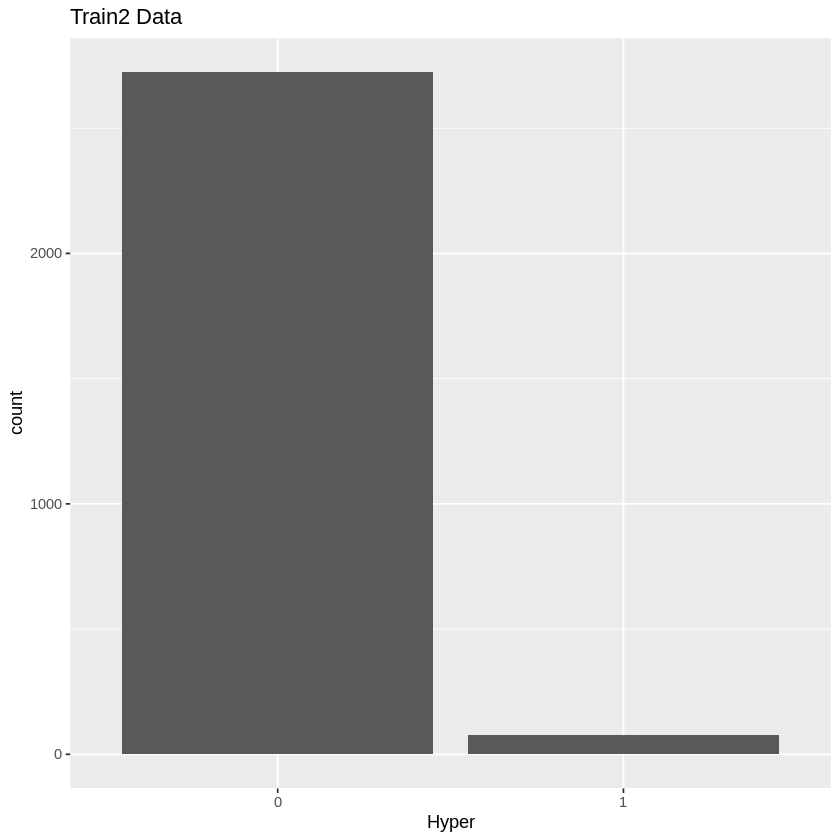

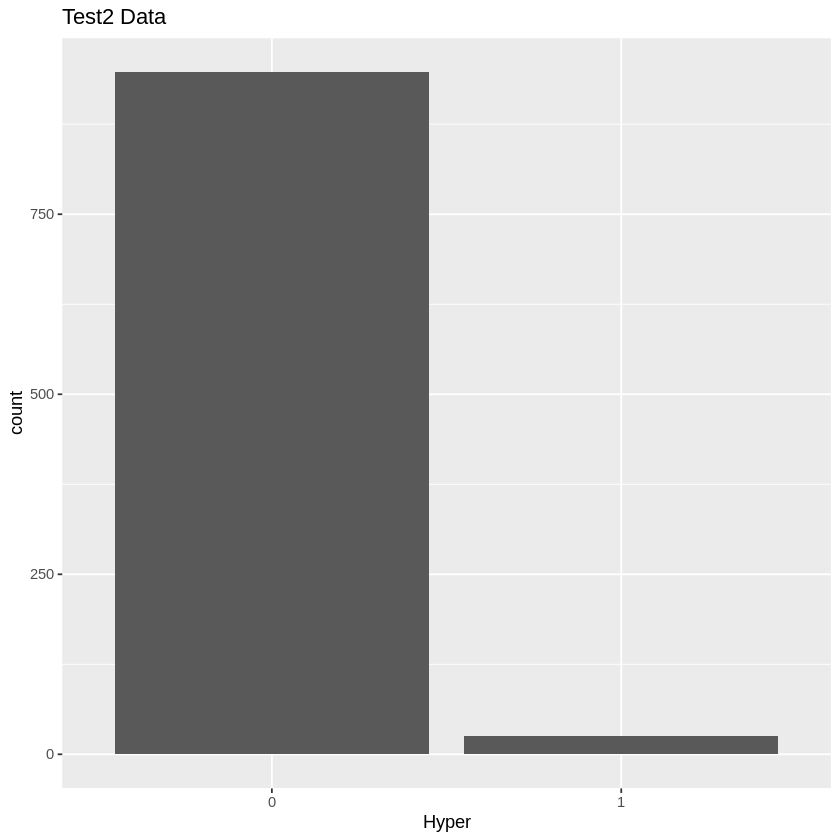

In [93]:
ggplot(train2, mapping = aes(Hyper)) +
  stat_count() +
  ggtitle("Train2 Data")
ggplot(test2, mapping = aes(Hyper)) +
  stat_count() +
  ggtitle("Test2 Data")

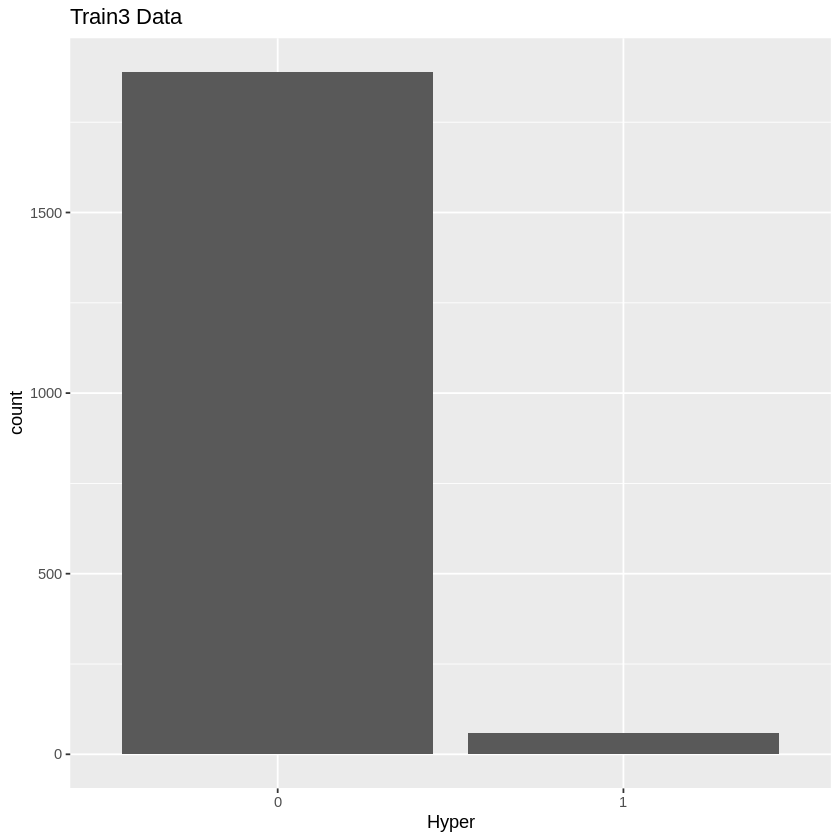

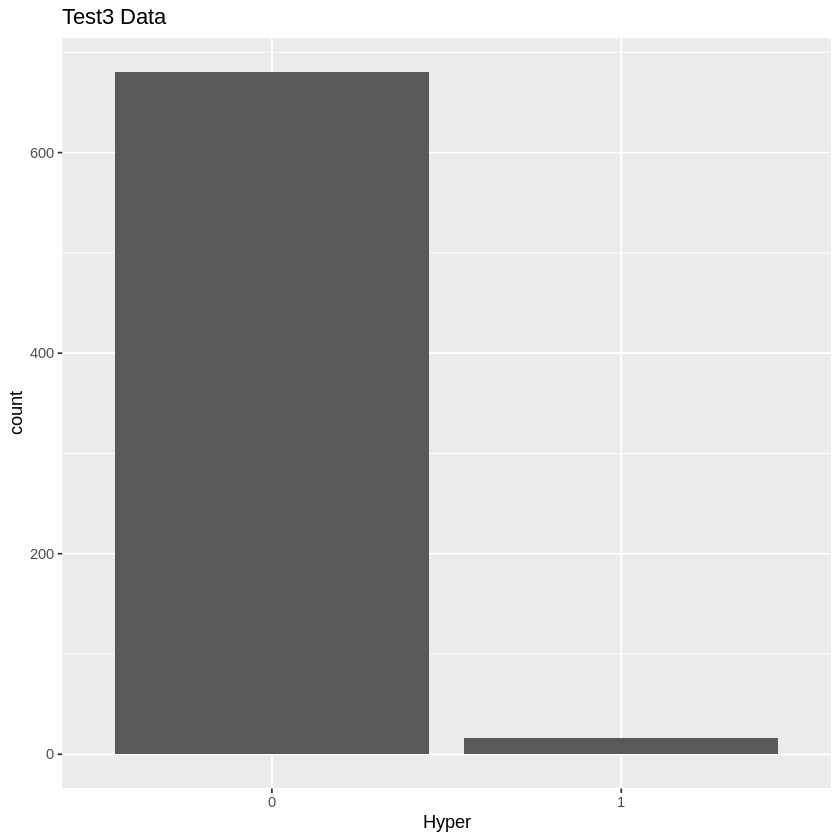

In [94]:
ggplot(train3, mapping = aes(Hyper)) +
  stat_count() +
  ggtitle("Train3 Data")
ggplot(test3, mapping = aes(Hyper)) +
  stat_count() +
  ggtitle("Test3 Data")

In [95]:
# Logistic

In [96]:
logit <- glm(Hyper~., data = train2, family = "binomial")
summary(logit)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hyper ~ ., family = "binomial", data = train2)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9039  -0.0657  -0.0169  -0.0001   3.3756  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.473e+01  3.949e+00  -3.732  0.00019 ***
Age                  6.572e-03  9.711e-03   0.677  0.49858    
Female1              1.578e+00  7.404e-01   2.131  0.03312 *  
On_thyroxine1       -3.399e+00  1.170e+00  -2.906  0.00366 ** 
Query_on_thyroxine1 -1.941e+01  5.190e+03  -0.004  0.99702    
On_anti_medi1        5.310e-02  1.220e+00   0.044  0.96527    
Sick1                2.548e-01  1.066e+00   0.239  0.81112    
Pregnant1            1.042e+00  1.074e+00   0.970  0.33184    
Surgery1            -1.653e+01  4.628e+03  -0.004  0.99715    
I131_treatment1      1.436e+00  1.161e+00   1.236  0.21636    
Query_hypo1         -1.669e+01  2.124e+03  -0.008  0.99373    
Query_hyper1        -7.367e-01  5.729e-01  -1.2

In [97]:
pred.logit <- predict(logit, newdata = test2, type = "response")

In [98]:
contrasts(train2$Hyper)

,1
0,0
1,1


In [99]:
pred.labels = ifelse(pred.logit > 0.5, 1, 0) 
pred.labels = as.factor(pred.labels)
head(pred.labels)

1    2    3    4    5    6 
<NA>    0    0    0    0 <NA> 
Levels: 0 1

In [100]:
confusionMatrix(pred.labels, test2$Hyper)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 676   7
         1   4   9
                                          
               Accuracy : 0.9842          
                 95% CI : (0.9719, 0.9921)
    No Information Rate : 0.977           
    P-Value [Acc > NIR] : 0.1241          
                                          
                  Kappa : 0.6127          
                                          
 Mcnemar's Test P-Value : 0.5465          
                                          
            Sensitivity : 0.9941          
            Specificity : 0.5625          
         Pos Pred Value : 0.9898          
         Neg Pred Value : 0.6923          
             Prevalence : 0.9770          
         Detection Rate : 0.9713          
   Detection Prevalence : 0.9813          
      Balanced Accuracy : 0.7783          
                                          
       'Positive' Class : 0               
                              

In [101]:
mean(pred.labels != test2$Hyper, na.rm = TRUE)

[1] 0.0158046

Setting levels: control = 0, case = 1

Setting direction: controls < cases



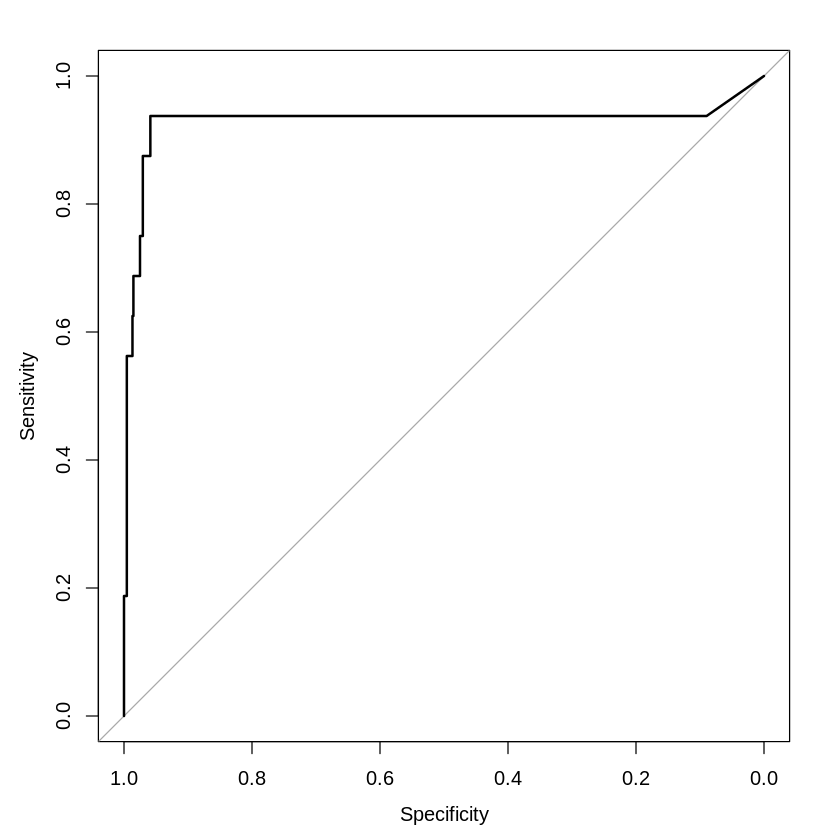

In [102]:
g <- roc(test2$Hyper, pred.logit)
plot(g)

In [103]:
logit2 <- glm(Hyper~., data = train3, family = "binomial")
summary(logit2)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hyper ~ ., family = "binomial", data = train3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.9039  -0.0657  -0.0169  -0.0001   3.3756  

Coefficients:
                      Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -1.473e+01  3.949e+00  -3.732  0.00019 ***
Age                  6.572e-03  9.711e-03   0.677  0.49858    
Female1              1.578e+00  7.404e-01   2.131  0.03312 *  
On_thyroxine1       -3.399e+00  1.170e+00  -2.906  0.00366 ** 
Query_on_thyroxine1 -1.941e+01  5.190e+03  -0.004  0.99702    
On_anti_medi1        5.310e-02  1.220e+00   0.044  0.96527    
Sick1                2.548e-01  1.066e+00   0.239  0.81112    
Pregnant1            1.042e+00  1.074e+00   0.970  0.33184    
Surgery1            -1.653e+01  4.628e+03  -0.004  0.99715    
I131_treatment1      1.436e+00  1.161e+00   1.236  0.21636    
Query_hypo1         -1.669e+01  2.124e+03  -0.008  0.99373    
Query_hyper1        -7.367e-01  5.729e-01  -1.2

In [104]:
pred.logit2 <- predict(logit2, newdata = test3, type = "response")

In [105]:
pred.labels2 = ifelse(pred.logit2 > 0.5, 1, 0) 
pred.labels2 = as.factor(pred.labels2)
head(pred.labels2)

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

In [106]:
confusionMatrix(pred.labels2, test3$Hyper)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 676   7
         1   4   9
                                          
               Accuracy : 0.9842          
                 95% CI : (0.9719, 0.9921)
    No Information Rate : 0.977           
    P-Value [Acc > NIR] : 0.1241          
                                          
                  Kappa : 0.6127          
                                          
 Mcnemar's Test P-Value : 0.5465          
                                          
            Sensitivity : 0.9941          
            Specificity : 0.5625          
         Pos Pred Value : 0.9898          
         Neg Pred Value : 0.6923          
             Prevalence : 0.9770          
         Detection Rate : 0.9713          
   Detection Prevalence : 0.9813          
      Balanced Accuracy : 0.7783          
                                          
       'Positive' Class : 0               
                              

In [107]:
(logit.test.err <- mean(pred.labels2 != test3$Hyper, na.rm = TRUE))

[1] 0.0158046

Setting levels: control = 0, case = 1

Setting direction: controls < cases



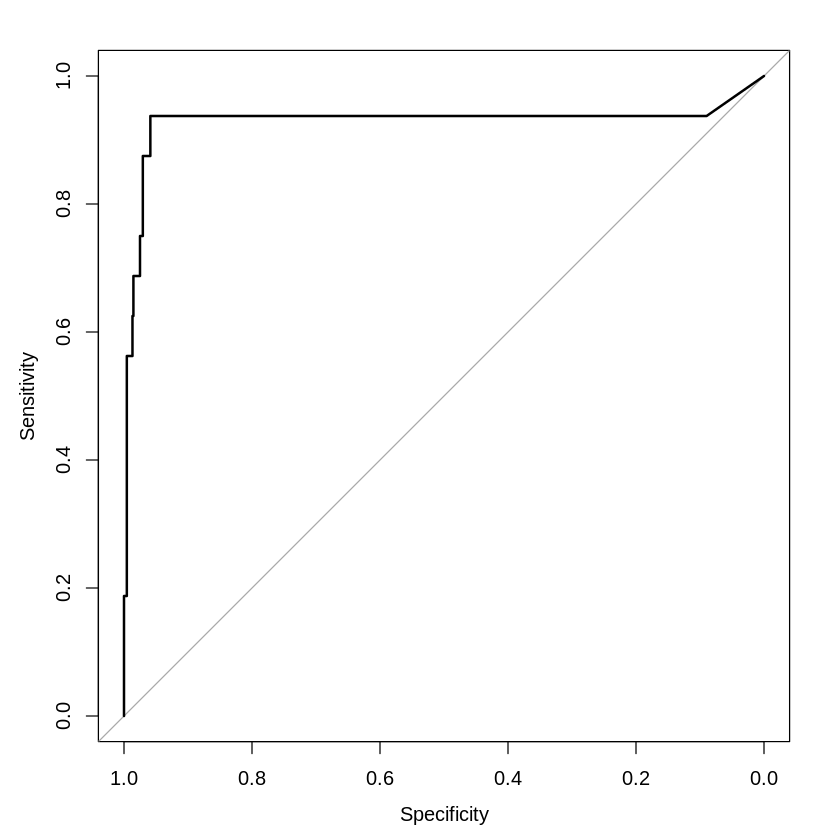

In [108]:
g2 <- roc(test3$Hyper, pred.logit2)
plot(g2)

In [109]:
logit3 <- glm(Hyper~Female+On_thyroxine+Tumor+TSH+T3+FTI, data = train3, family = "binomial")
summary(logit3)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hyper ~ Female + On_thyroxine + Tumor + TSH + T3 + 
    FTI, family = "binomial", data = train3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8735  -0.0821  -0.0252  -0.0041   3.2374  

Coefficients:
                Estimate Std. Error z value Pr(>|z|)    
(Intercept)   -10.546486   1.291726  -8.165 3.22e-16 ***
Female1         1.366344   0.668610   2.044  0.04100 *  
On_thyroxine1  -3.212500   1.075844  -2.986  0.00283 ** 
Tumor1          2.547064   0.594313   4.286 1.82e-05 ***
TSH            -2.549160   0.818994  -3.113  0.00185 ** 
T3              0.847257   0.191409   4.426 9.58e-06 ***
FTI             0.036302   0.005629   6.449 1.13e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 528.78  on 1946  degrees of freedom
Residual deviance: 187.92  on 1940  degrees of freedom
AIC: 201.92

Number of Fisher Scoring iterations: 13


In [110]:
pred.logit3 <- predict(logit3, newdata = test3, type = "response")

In [111]:
pred.labels3 = ifelse(pred.logit3 > 0.5, 1, 0) 
pred.labels3 = as.factor(pred.labels3)
head(pred.labels3)

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

In [112]:
confusionMatrix(pred.labels3, test3$Hyper)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 677  10
         1   3   6
                                        
               Accuracy : 0.9813        
                 95% CI : (0.9683, 0.99)
    No Information Rate : 0.977         
    P-Value [Acc > NIR] : 0.27167       
                                        
                  Kappa : 0.4712        
                                        
 Mcnemar's Test P-Value : 0.09609       
                                        
            Sensitivity : 0.9956        
            Specificity : 0.3750        
         Pos Pred Value : 0.9854        
         Neg Pred Value : 0.6667        
             Prevalence : 0.9770        
         Detection Rate : 0.9727        
   Detection Prevalence : 0.9871        
      Balanced Accuracy : 0.6853        
                                        
       'Positive' Class : 0             
                                        

In [113]:
(logit.test.err <- mean(pred.labels3 != test3$Hyper, na.rm = TRUE))

[1] 0.01867816

In [115]:
# LDA

In [116]:
lda <- lda(Hyper~., data = train2)
lda

Call:
lda(Hyper ~ ., data = train2)

Prior probabilities of groups:
         0          1 
0.96969697 0.03030303 

Group means:
       Age   Female1 On_thyroxine1 Query_on_thyroxine1 On_anti_medi1      Sick1
0 53.25212 0.6509534    0.09639831         0.009533898    0.01324153 0.04661017
1 52.06780 0.8983051    0.01694915         0.000000000    0.01694915 0.03389831
   Pregnant1   Surgery1 I131_treatment1 Query_hypo1 Query_hyper1    Lithium1
0 0.01536017 0.01324153      0.01588983  0.05084746   0.05508475 0.005826271
1 0.05084746 0.00000000      0.03389831  0.00000000   0.30508475 0.000000000
      Goitre1     Tumor1 Hypopituitary1     Psych1       TSH       T3      TT4
0 0.007944915 0.01800847    0.000529661 0.06832627 4.5091287 1.960328 106.4770
1 0.000000000 0.16949153    0.000000000 0.00000000 0.1190678 3.761017 181.8305
        T4U      FTI
0 0.9988633 107.5378
1 0.9932203 188.8475

Coefficients of linear discriminants:
                             LD1
Age                  0.004670

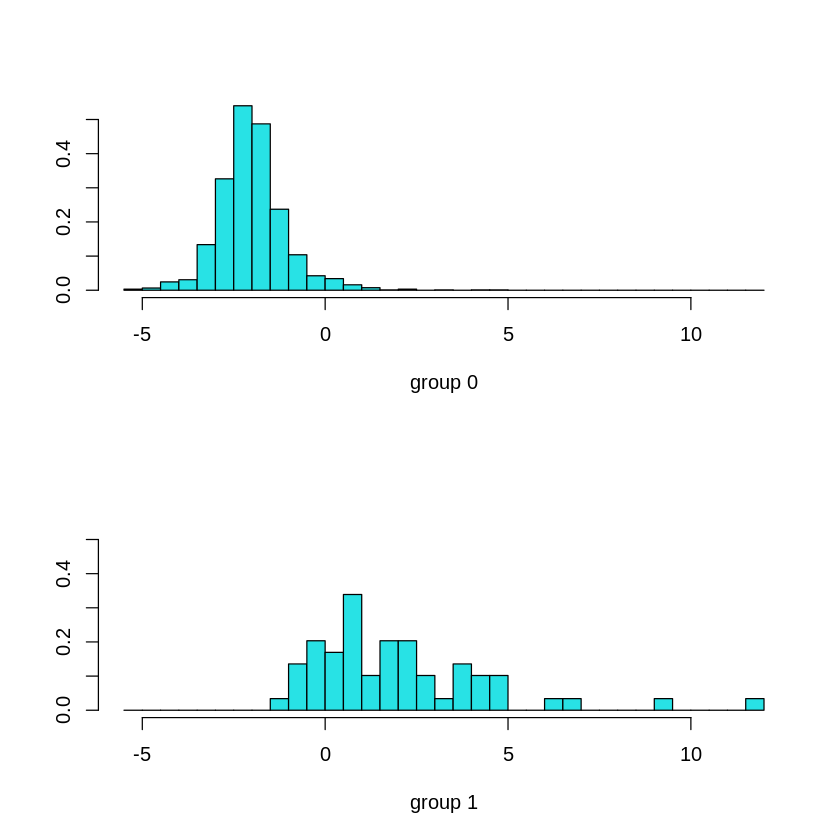

In [117]:
plot(lda)

In [118]:
pred.lda <- predict(lda, newdata = test2)
names(pred.lda)

Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FUN(newX[, i], ...):
“no non-missing arguments to min; returning Inf”
Warning message in FU

[1] "class"     "posterior" "x"

In [119]:
confusionMatrix(pred.lda$class, test2$Hyper)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 671   6
         1   9  10
                                          
               Accuracy : 0.9784          
                 95% CI : (0.9647, 0.9879)
    No Information Rate : 0.977           
    P-Value [Acc > NIR] : 0.4656          
                                          
                  Kappa : 0.5605          
                                          
 Mcnemar's Test P-Value : 0.6056          
                                          
            Sensitivity : 0.9868          
            Specificity : 0.6250          
         Pos Pred Value : 0.9911          
         Neg Pred Value : 0.5263          
             Prevalence : 0.9770          
         Detection Rate : 0.9641          
   Detection Prevalence : 0.9727          
      Balanced Accuracy : 0.8059          
                                          
       'Positive' Class : 0               
                              

In [120]:
mean(pred.lda$class != test2$Hyper, na.rm = TRUE)

[1] 0.02155172

In [121]:
lda2 <- lda(Hyper~., data = train3)
lda2

Call:
lda(Hyper ~ ., data = train3)

Prior probabilities of groups:
         0          1 
0.96969697 0.03030303 

Group means:
       Age   Female1 On_thyroxine1 Query_on_thyroxine1 On_anti_medi1      Sick1
0 53.25212 0.6509534    0.09639831         0.009533898    0.01324153 0.04661017
1 52.06780 0.8983051    0.01694915         0.000000000    0.01694915 0.03389831
   Pregnant1   Surgery1 I131_treatment1 Query_hypo1 Query_hyper1    Lithium1
0 0.01536017 0.01324153      0.01588983  0.05084746   0.05508475 0.005826271
1 0.05084746 0.00000000      0.03389831  0.00000000   0.30508475 0.000000000
      Goitre1     Tumor1 Hypopituitary1     Psych1       TSH       T3      TT4
0 0.007944915 0.01800847    0.000529661 0.06832627 4.5091287 1.960328 106.4770
1 0.000000000 0.16949153    0.000000000 0.00000000 0.1190678 3.761017 181.8305
        T4U      FTI
0 0.9988633 107.5378
1 0.9932203 188.8475

Coefficients of linear discriminants:
                             LD1
Age                  0.004670

In [122]:
pred.lda2 <- predict(lda2, newdata = test3)
names(pred.lda2)

[1] "class"     "posterior" "x"

In [123]:
confusionMatrix(pred.lda2$class, test3$Hyper)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 671   6
         1   9  10
                                          
               Accuracy : 0.9784          
                 95% CI : (0.9647, 0.9879)
    No Information Rate : 0.977           
    P-Value [Acc > NIR] : 0.4656          
                                          
                  Kappa : 0.5605          
                                          
 Mcnemar's Test P-Value : 0.6056          
                                          
            Sensitivity : 0.9868          
            Specificity : 0.6250          
         Pos Pred Value : 0.9911          
         Neg Pred Value : 0.5263          
             Prevalence : 0.9770          
         Detection Rate : 0.9641          
   Detection Prevalence : 0.9727          
      Balanced Accuracy : 0.8059          
                                          
       'Positive' Class : 0               
                              

In [124]:
(lda.test.err <- mean(pred.lda2$class != test3$Hyper, na.rm = TRUE))

[1] 0.02155172

In [126]:
# KNN

In [127]:
KNN <- knn(train3, test3, train3$Hyper, k = 10)
confusionMatrix(KNN, test3$Hyper)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 671  10
         1   9   6
                                          
               Accuracy : 0.9727          
                 95% CI : (0.9577, 0.9835)
    No Information Rate : 0.977           
    P-Value [Acc > NIR] : 0.8147          
                                          
                  Kappa : 0.3732          
                                          
 Mcnemar's Test P-Value : 1.0000          
                                          
            Sensitivity : 0.9868          
            Specificity : 0.3750          
         Pos Pred Value : 0.9853          
         Neg Pred Value : 0.4000          
             Prevalence : 0.9770          
         Detection Rate : 0.9641          
   Detection Prevalence : 0.9784          
      Balanced Accuracy : 0.6809          
                                          
       'Positive' Class : 0               
                              

In [128]:
(knn.test.err <- mean(KNN != test3$Hyper))

[1] 0.02729885

In [129]:
test.err <- data.frame("Test Error" = c(logit.test.err, lda.test.err, knn.test.err))
rownames(test.err) <- c("Logit", "LDA", "KNN")
test.err

,Test.Error
,<dbl>
Logit,0.01867816
LDA,0.02155172
KNN,0.02729885


In [130]:
# 10-fold CV

In [131]:
control <- trainControl(method="cv", number=10)

In [132]:
set.seed(8)
# Logit
logit.cv <- caret::train(Hyper~., data=train3, method="glm",family="binomial", trControl=control)
# LDA
lda.cv <- caret::train(Hyper~., data=train3, method="lda", trControl=control)
# kNN
knn.cv <- caret::train(Hyper~., data=train3, method="knn", trControl=control)

results <- resamples(list(LR=logit.cv, LDA=lda.cv, KNN=knn.cv))
summary(results)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from a rank-deficient fit may be misleading”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning m


Call:
summary.resamples(object = results)

Models: LR, LDA, KNN 
Number of resamples: 10 

Accuracy 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LR  0.9692308 0.9794079 0.9845361 0.9825377 0.9846154 0.9948718    0
LDA 0.9589744 0.9742268 0.9793814 0.9766059 0.9794872 0.9896907    1
KNN 0.9692308 0.9692308 0.9742268 0.9743220 0.9781258 0.9846154    0

Kappa 
         Min.   1st Qu.    Median      Mean   3rd Qu.      Max. NA's
LR  0.4841270 0.5929798 0.6596675 0.6670240 0.7511092 0.9064748    0
LDA 0.2793462 0.3848580 0.6022032 0.5697029 0.7194245 0.7949260    1
KNN 0.2382813 0.3848580 0.4942786 0.4961630 0.6555353 0.7194245    0


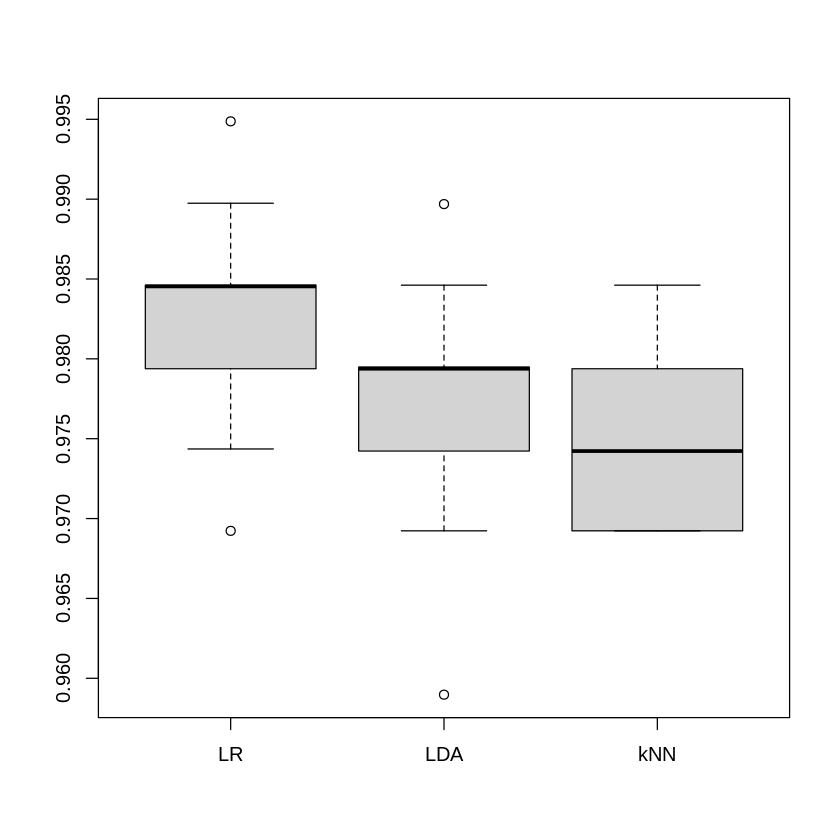

In [133]:
boxplot(results$values[,"LR~Accuracy"],results$values[,"LDA~Accuracy"], results$values[,"KNN~Accuracy"], names=c("LR","LDA","kNN"))

In [135]:
# LOOCV

In [136]:
control <- trainControl(method="LOOCV")

In [137]:
logit.loocv <- caret::train(Hyper~., data = train3, method = "glm", family = "binomial", trControl = control)
lda.loocv <- caret::train(Hyper~., data = train3, method = "lda", trControl = control)
knn.loocv <- caret::train(Hyper~., data = train3, method = "knn", trControl = control)
logit.loocv
lda.loocv
knn.loocv

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”

Generalized Linear Model 

1947 samples
  21 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1946, 1946, 1946, 1946, 1946, 1946, ... 
Resampling results:

  Accuracy   Kappa    
  0.9809964  0.6380077


Linear Discriminant Analysis 

1947 samples
  21 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1946, 1946, 1946, 1946, 1946, 1946, ... 
Resampling results:

  Accuracy   Kappa    
  0.9784173  0.6139217


k-Nearest Neighbors 

1947 samples
  21 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Leave-One-Out Cross-Validation 
Summary of sample sizes: 1946, 1946, 1946, 1946, 1946, 1946, ... 
Resampling results across tuning parameters:

  k  Accuracy   Kappa    
  5  0.9738059  0.5352113
  7  0.9743195  0.5323129
  9  0.9743195  0.5062837

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was k = 9.

In [139]:
# Subset Selection

In [140]:
train4 <- read_csv("hyper_train.csv")
test4 <- read_csv("hyper_test.csv")

Rows: 2800 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (27): Age, Female, On_thyroxine, Query_on_thyroxine, On_anti_medi, Sick,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 972 Columns: 27
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (27): Age, Female, On_thyroxine, Query_on_thyroxine, On_anti_medi, Sick,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [141]:
train4 <- train4 %>%
    dplyr::select(-c(TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured))
test4 <- test4 %>%
    dplyr::select(-c(TSH_measured, T3_measured, TT4_measured, T4U_measured, FTI_measured))

In [142]:
str(train4)
str(test4)

tibble [2,800 × 22] (S3: tbl_df/tbl/data.frame)
 $ Age               : num [1:2800] 41 23 46 70 70 18 59 80 66 68 ...
 $ Female            : num [1:2800] 1 1 0 1 1 1 1 1 1 0 ...
 $ On_thyroxine      : num [1:2800] 0 0 0 1 0 1 0 0 0 0 ...
 $ Query_on_thyroxine: num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ On_anti_medi      : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Sick              : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Pregnant          : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Surgery           : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ I131_treatment    : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hypo        : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hyper       : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Lithium           : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Goitre            : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor             : num [1:2800] 0 0 0 0 0 0 0 0 1 0 ...
 $ Hypopituitary     : num [1:2800] 0 0 0 0 0 0 0 0 0 0 ...
 $ Psych             : num [1:2800] 0 0 0 

In [143]:
set.seed(8)
fit.sub <- regsubsets(Hyper ~ ., data = train4, nvmax = 21)
fit.sub.sum<-summary(fit.sub)
fit.sub.sum

Subset selection object
Call: regsubsets.formula(Hyper ~ ., data = train4, nvmax = 21)
21 Variables  (and intercept)
                   Forced in Forced out
Age                    FALSE      FALSE
Female                 FALSE      FALSE
On_thyroxine           FALSE      FALSE
Query_on_thyroxine     FALSE      FALSE
On_anti_medi           FALSE      FALSE
Sick                   FALSE      FALSE
Pregnant               FALSE      FALSE
Surgery                FALSE      FALSE
I131_treatment         FALSE      FALSE
Query_hypo             FALSE      FALSE
Query_hyper            FALSE      FALSE
Lithium                FALSE      FALSE
Goitre                 FALSE      FALSE
Tumor                  FALSE      FALSE
Hypopituitary          FALSE      FALSE
Psych                  FALSE      FALSE
TSH                    FALSE      FALSE
T3                     FALSE      FALSE
TT4                    FALSE      FALSE
T4U                    FALSE      FALSE
FTI                    FALSE      FALSE
1 s

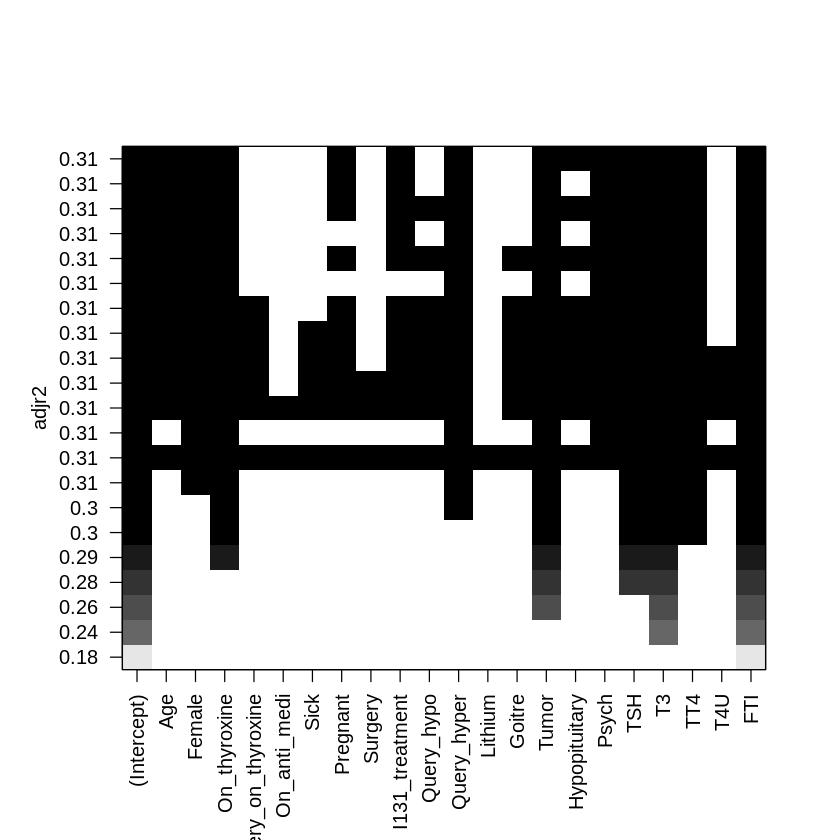

In [144]:
plot(fit.sub, scale='adjr2')

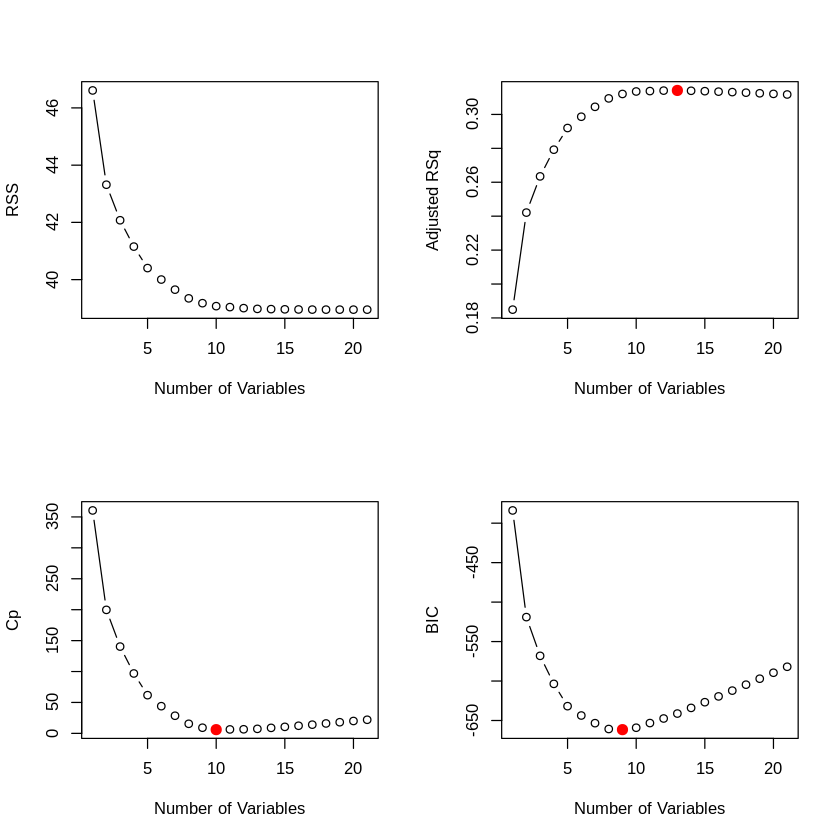

In [145]:
par(mfrow = c(2, 2))
plot(fit.sub.sum$rss, xlab = "Number of Variables", ylab = "RSS", type = "b")

plot(fit.sub.sum$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "b")
best.adjr2 = which.max(fit.sub.sum$adjr2)
points(best.adjr2, fit.sub.sum$adjr2[best.adjr2],
       col = "red",cex = 2, pch = 20)

plot(fit.sub.sum$cp, xlab = "Number of Variables", ylab = "Cp", type = 'b')
best.cp = which.min(fit.sub.sum$cp)
points(best.cp, fit.sub.sum$cp[best.cp], 
       col = "red", cex = 2, pch = 20)

plot(fit.sub.sum$bic, xlab = "Number of Variables", ylab = "BIC", type = 'b')
best.bic = which.min(fit.sub.sum$bic)
points(best.bic, fit.sub.sum$bic[best.bic], 
       col = "red", cex = 2, pch = 20)

In [146]:
set.seed(8)
fit.sub2 <- regsubsets(Hyper ~ ., data = train4, nvmax = 14)
fit.sub.sum2<-summary(fit.sub2)
fit.sub.sum2

Subset selection object
Call: regsubsets.formula(Hyper ~ ., data = train4, nvmax = 14)
21 Variables  (and intercept)
                   Forced in Forced out
Age                    FALSE      FALSE
Female                 FALSE      FALSE
On_thyroxine           FALSE      FALSE
Query_on_thyroxine     FALSE      FALSE
On_anti_medi           FALSE      FALSE
Sick                   FALSE      FALSE
Pregnant               FALSE      FALSE
Surgery                FALSE      FALSE
I131_treatment         FALSE      FALSE
Query_hypo             FALSE      FALSE
Query_hyper            FALSE      FALSE
Lithium                FALSE      FALSE
Goitre                 FALSE      FALSE
Tumor                  FALSE      FALSE
Hypopituitary          FALSE      FALSE
Psych                  FALSE      FALSE
TSH                    FALSE      FALSE
T3                     FALSE      FALSE
TT4                    FALSE      FALSE
T4U                    FALSE      FALSE
FTI                    FALSE      FALSE
1 s

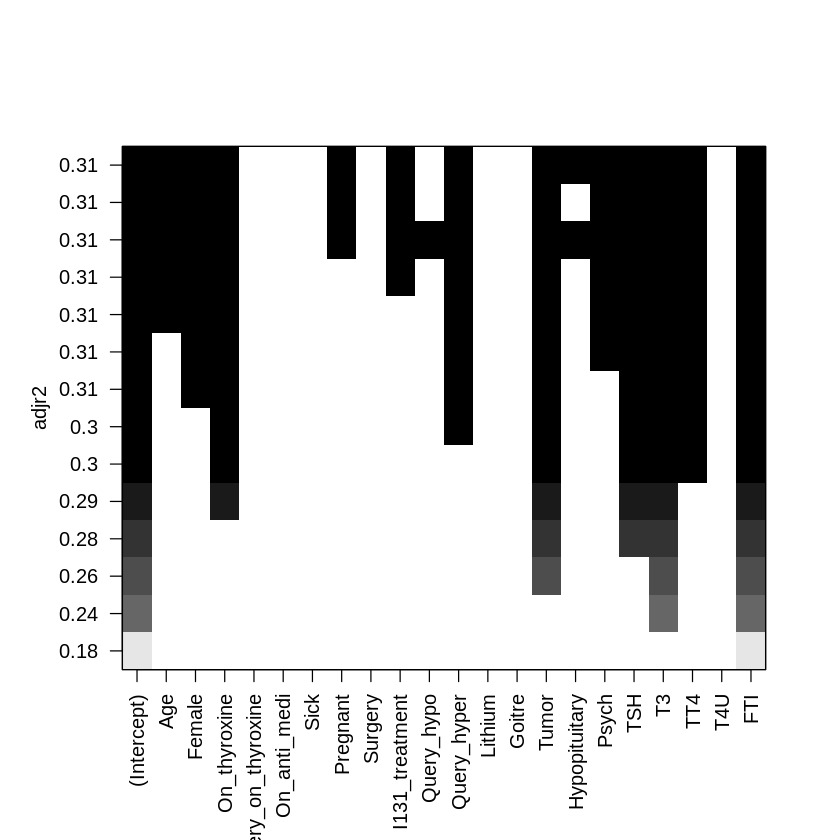

In [147]:
plot(fit.sub2, scale='adjr2')

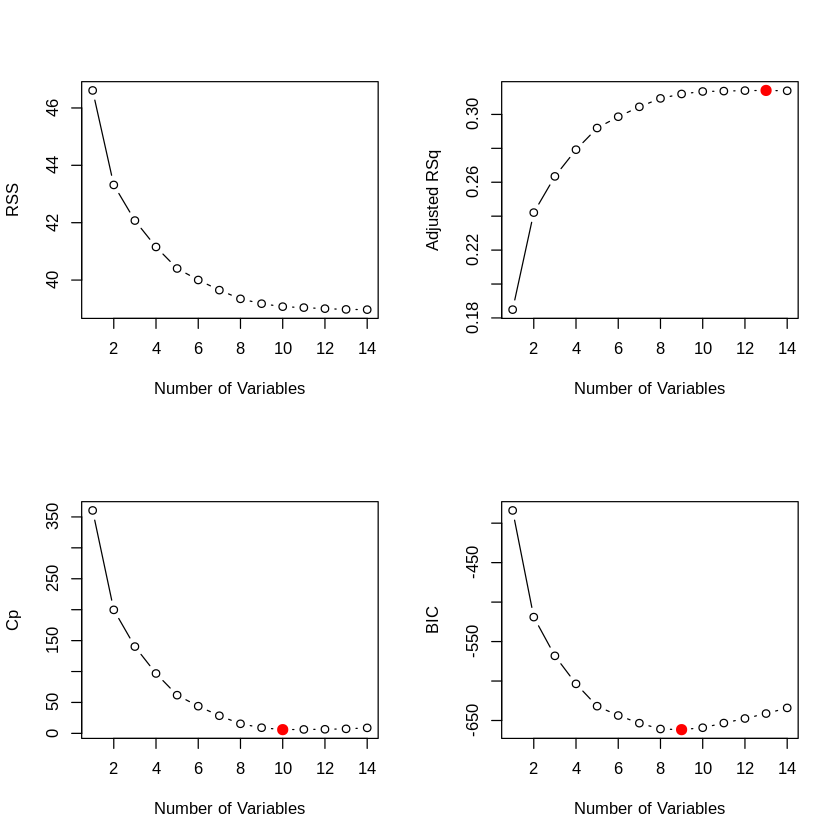

In [148]:
par(mfrow = c(2, 2))
plot(fit.sub.sum2$rss, xlab = "Number of Variables", ylab = "RSS", type = "b")

plot(fit.sub.sum2$adjr2, xlab = "Number of Variables", ylab = "Adjusted RSq", type = "b")
best.adjr22 = which.max(fit.sub.sum2$adjr2)
points(best.adjr22, fit.sub.sum2$adjr2[best.adjr22],
       col = "red",cex = 2, pch = 20)

plot(fit.sub.sum2$cp, xlab = "Number of Variables", ylab = "Cp", type = 'b')
best.cp2 = which.min(fit.sub.sum2$cp)
points(best.cp2, fit.sub.sum2$cp[best.cp2], 
       col = "red", cex = 2, pch = 20)

plot(fit.sub.sum2$bic, xlab = "Number of Variables", ylab = "BIC", type = 'b')
best.bic2 = which.min(fit.sub.sum2$bic)
points(best.bic2, fit.sub.sum2$bic[best.bic2], 
       col = "red", cex = 2, pch = 20)

In [149]:
set.seed(8)
fit.fwd <- regsubsets(Hyper~., data = train4, nvmax = 14, method = "forward")
fit.bwd <- regsubsets(Hyper~., data = train4, nvmax = 14, method = "backward")

In [150]:
comparison <- data.frame(
    "Cp" = c(which.min(summary(fit.sub2)$cp), which.min(summary(fit.fwd)$cp), which.min(summary(fit.bwd)$cp)),
    "BIC" = c(which.min(summary(fit.sub2)$bic), which.min(summary(fit.fwd)$bic), which.min(summary(fit.bwd)$bic)),
    "Adj-R2" = c(which.max(summary(fit.sub2)$adjr2), which.max(summary(fit.fwd)$adjr2), which.max(summary(fit.bwd)$adjr2))
)
row.names(comparison) <- c("Best Subset", "Forward Stepwise", "Backward Stepwise")
comparison

,Cp,BIC,Adj.R2
,<int>,<int>,<int>
Best Subset,10,9,13
Forward Stepwise,10,9,13
Backward Stepwise,10,9,13


In [151]:
data.frame(coef(fit.sub2, 13))

,coef.fit.sub2..13.
,<dbl>
(Intercept),-0.3467558795
Age,0.0003766124
Female,0.0247678645
On_thyroxine,-0.0649922057
Pregnant,0.0368756392
I131_treatment,0.0342195694
Query_hyper,0.0473285894
Tumor,0.1558655878
Hypopituitary,0.1624912233


In [152]:
pred.sub <- (-0.3467558795 + 0.0003766124*test4$Age + 0.0247678645*test4$Female - 0.0649922057*test4$On_thyroxine + 0.0368756392*test4$Pregnant + 0.0342195694*test4$I131_treatment
    + 0.0473285894*test4$Query_hyper + 0.1558655878*test4$Tumor + 0.1624912233*test4$Hypopituitary - 0.0341583680*test4$Psych + 0.0012654576*test4$TSH + 0.0656394689*test4$T3
    - 0.0010241494*test4$TT4 + 0.0028629841*test4$FTI)

In [153]:
range(pred.sub, na.rm=TRUE)

[1] -0.2601067  0.7091762

In [154]:
pred.labels <- ifelse(pred.sub > 0.5, 1, 0)
mean(pred.labels != test4$Hyper, na.rm = TRUE)

[1] 0.02011494

In [155]:
train5 <- na.omit(train4)
test5 <- na.omit(test4)
fit.best <- regsubsets(Hyper~., data = train5, nvmax = 21)
test_mat = model.matrix(Hyper ~ ., data = test5) #
test_err = rep(0, times = 21)
for (i in seq_along(test_err)) {
  coefs = coef(fit.best, id = i)
  pred = test_mat[, names(coefs)] %*% coefs
  pred.l <- ifelse(pred > 0.5, 1, 0)
  test_err[i] <- sqrt(mean((test5$Hyper - pred.l) ^ 2))
}
test_err

[1] 0.1516196 0.1468051 0.1516196 0.1468051 0.1516196 0.1418272 0.1418272
 [8] 0.1366681 0.1366681 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272
[15] 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272

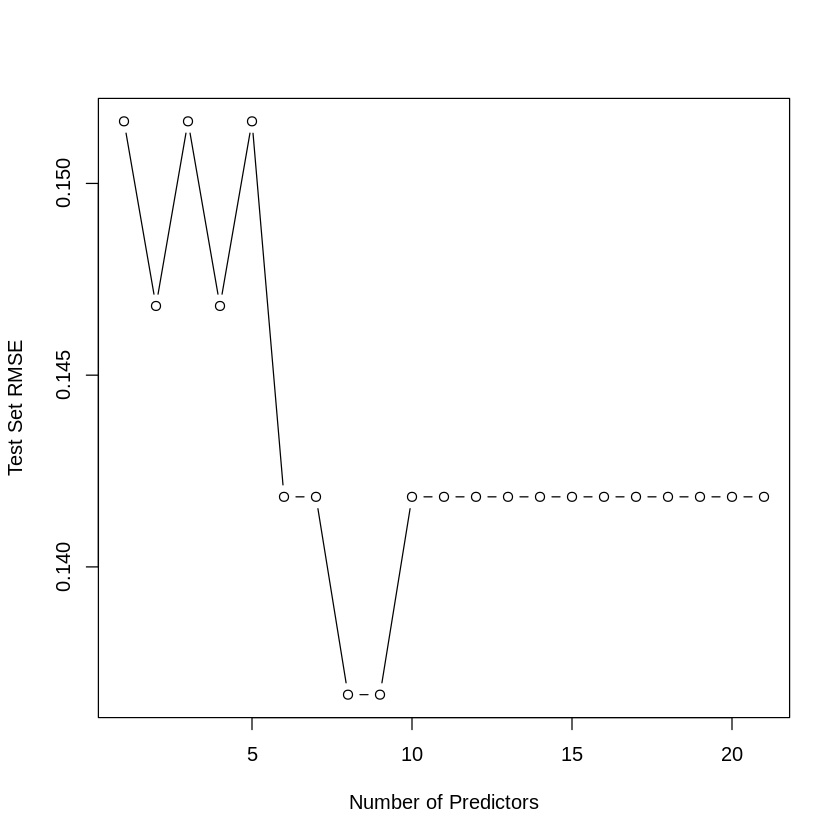

In [156]:
plot(test_err, type='b', ylab = "Test Set RMSE", xlab = "Number of Predictors")

In [157]:
which.min(test_err)
coef(fit.best, which.min(test_err))

[1] 8

(Intercept)        Female  On_thyroxine   Query_hyper         Tumor 
-0.3248297586  0.0274455363 -0.0617001438  0.0532720652  0.1582696671 
          TSH            T3           TT4           FTI 
 0.0012378472  0.0627142706 -0.0009708472  0.0028159200

In [158]:
pred.sub.best <- (-0.32482975863371 + 0.0274455363315078*test5$Female - 0.0617001437605943*test5$On_thyroxine + 0.0532720651539779*test5$Query_hyper + 0.158269667076897*test5$Tumor
    + 0.00123784724703516*test5$TSH + 0.0627142705998039*test5$T3 - 0.00097084719670272*test5$TT4 + 0.00281591995377625*test5$FTI)

In [159]:
range(pred.sub.best)

[1] -0.2502284  0.7000325

In [160]:
pred.labels.best <- ifelse(pred.sub.best > 0.5, 1, 0)
mean(pred.labels.best != test5$Hyper)

[1] 0.01867816

In [161]:
set.seed(8)
train.control <- trainControl(method = "cv", number = 10)

In [162]:
fit.stepwise <- caret::train(Hyper ~., data = train5,
                    method = "leapForward", 
                    tuneGrid = data.frame(nvmax = 1:21),
                    trControl = train.control
                    )

Warning message in train.default(x, y, weights = w, ...):
“You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column.”
Warning message in leaps.setup(x, y, wt = weights, nbest = nbest, nvmax = nvmax, :
“1  linear dependencies found”


Reordering variables and trying again:


Warning message in rval$lopt[] <- rval$vorder[rval$lopt]:
“number of items to replace is not a multiple of replacement length”
Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
“There were missing values in resampled performance measures.”


In [163]:
fit.stepwise$bestTune

,nvmax
,<int>
10,10


In [164]:
coef(fit.stepwise$finalModel, 10)

(Intercept)           Age        Female  On_thyroxine   Query_hyper 
-0.3442131113  0.0003674066  0.0246474105 -0.0635445200  0.0513343500 
        Tumor         Psych           TSH            T3           TT4 
 0.1572004779 -0.0348073133  0.0012503325  0.0658864588 -0.0009588180 
          FTI 
 0.0027845053

In [165]:
pred.sub.stepwise <- (-0.344213111267975 + 0.000367406565429274*test5$Age + 0.0246474105441988*test5$Female - 0.0635445199693773*test5$On_thyroxine + 0.0513343499993669*test5$Query_hyper
    + 0.157200477899579*test5$Tumor - 0.0348073133193198*test5$Psych + 0.00125033252642895*test5$TSH + 0.065886458795445*test5$T3 - 0.000958817992405194*test5$TT4 + 0.00278450534746067*test5$FTI)

In [166]:
range(pred.sub.stepwise)

[1] -0.2583517  0.7098482

In [167]:
pred.labels.stepwise <- ifelse(pred.sub.best > 0.5, 1, 0)
mean(pred.labels.stepwise != test5$Hyper)

[1] 0.01867816

In [168]:
train8 <- train5
train8 <- train8 %>%
  mutate(Agesq = Age^2) %>%
  mutate(Agecu = Age^3) %>%
  mutate(TSHsq = TSH^2) %>%
  mutate(TSHcu = TSH^3) %>%
  mutate(T3sq = T3^2) %>%
  mutate(T3cu = T3^3) %>%
  mutate(TT4sq = TT4^2) %>%
  mutate(TT4cu = TT4^3) %>%
  mutate(T4Usq = T4U^2) %>%
  mutate(T4Ucu = T4U^3) %>%
  mutate(FTIsq = FTI^2) %>%
  mutate(FTIcu = FTI^3)
test8 <- test5
test8 <- test8 %>%
  mutate(Agesq = Age^2) %>%
  mutate(Agecu = Age^3) %>%
  mutate(TSHsq = TSH^2) %>%
  mutate(TSHcu = TSH^3) %>%
  mutate(T3sq = T3^2) %>%
  mutate(T3cu = T3^3) %>%
  mutate(TT4sq = TT4^2) %>%
  mutate(TT4cu = TT4^3) %>%
  mutate(T4Usq = T4U^2) %>%
  mutate(T4Ucu = T4U^3) %>%
  mutate(FTIsq = FTI^2) %>%
  mutate(FTIcu = FTI^3)
str(train8)
str(test8)

tibble [1,947 × 34] (S3: tbl_df/tbl/data.frame)
 $ Age               : num [1:1947] 41 70 80 66 68 84 71 59 28 63 ...
 $ Female            : num [1:1947] 1 1 1 1 0 1 1 1 0 1 ...
 $ On_thyroxine      : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_on_thyroxine: num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ On_anti_medi      : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Sick              : num [1:1947] 0 0 0 0 0 0 1 0 0 0 ...
 $ Pregnant          : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Surgery           : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ I131_treatment    : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hypo        : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hyper       : num [1:1947] 0 0 0 0 0 0 1 0 0 0 ...
 $ Lithium           : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Goitre            : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor             : num [1:1947] 0 0 0 1 0 1 0 0 0 0 ...
 $ Hypopituitary     : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Psych             : num [1:1947] 0 0 0 

In [169]:
fit.best.2 <- regsubsets(Hyper~., data = train8, nvmax = 33)
test_mat.2 = model.matrix(Hyper ~ ., data = test8) #
test_err.2 = rep(0, times = 33)
for (i in seq_along(test_err.2)) {
  coefs.2 = coef(fit.best.2, id = i)
  pred.2 = test_mat.2[, names(coefs.2)] %*% coefs.2
  pred.l.2 <- ifelse(pred.2 > 0.5, 1, 0)
  test_err.2[i] <- sqrt(mean((test8$Hyper - pred.l.2) ^ 2))
}
test_err.2

[1] 0.1516196 0.1418272 0.1468051 0.1418272 0.1468051 0.1418272 0.1418272
 [8] 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272
[15] 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272
[22] 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272
[29] 0.1418272 0.1418272 0.1418272 0.1418272 0.1418272

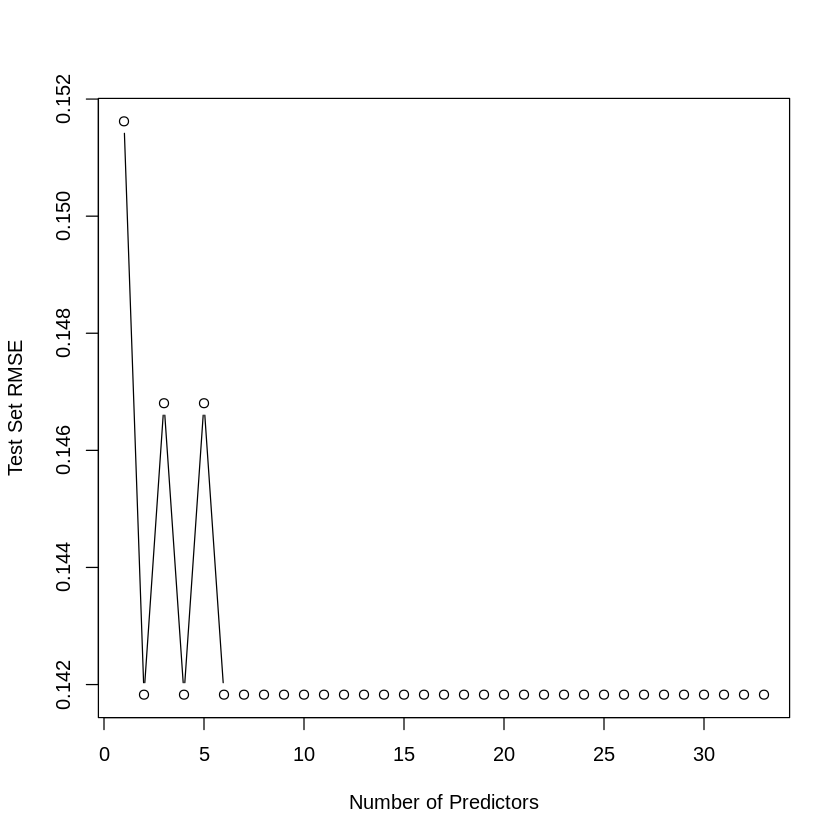

In [170]:
plot(test_err.2, type='b', ylab = "Test Set RMSE", xlab = "Number of Predictors")

In [171]:
which.min(test_err.2)
coef(fit.best.2, which.min(test_err.2))
coef(fit.best.2, 4)
coef(fit.best.2, 6)

[1] 2

(Intercept)          T3sq         FTIsq 
-1.090308e-01  7.955781e-03  7.728988e-06

(Intercept)            T3           FTI         FTIsq         FTIcu 
 1.989723e-01  4.791207e-02 -7.850925e-03  5.622047e-05 -8.180910e-08

(Intercept)  On_thyroxine         Tumor            T3           FTI 
 1.949666e-01 -6.362716e-02  1.611882e-01  4.490083e-02 -7.765659e-03 
        FTIsq         FTIcu 
 5.663997e-05 -8.325246e-08

In [172]:
summary(fit.best.2)$rsq

[1] 0.2659521 0.3063999 0.3298321 0.3582729 0.3784599 0.3898178 0.3977142
 [8] 0.4042679 0.4080851 0.4109760 0.4131843 0.4149354 0.4166481 0.4179344
[15] 0.4191909 0.4204526 0.4213259 0.4221794 0.4228328 0.4236510 0.4241097
[22] 0.4245272 0.4248887 0.4251813 0.4254260 0.4256653 0.4257097 0.4257539
[29] 0.4257788 0.4257959 0.4258070 0.4258137 0.4258150

In [174]:
# Ridge & LASSO

In [175]:
train.x <- as.matrix(train5[,1:21])
train.y <- as.matrix(train5[,22])
test.x <- as.matrix(test5[,1:21])
test.y <- as.matrix(test5[,22])

In [176]:
set.seed(8)
cv.ridge <- cv.glmnet(train.x, train.y, alpha = 0)

In [177]:
names(cv.ridge)

[1] "lambda"     "cvm"        "cvsd"       "cvup"       "cvlo"      
 [6] "nzero"      "call"       "name"       "glmnet.fit" "lambda.min"
[11] "lambda.1se" "index"

In [178]:
cv.ridge$lambda.min

[1] 0.007379209

In [179]:
coef(cv.ridge, s=cv.ridge$lambda.min)

22 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)        -0.2157052179
Age                 0.0003439552
Female              0.0239253941
On_thyroxine       -0.0624214478
Query_on_thyroxine -0.0163830207
On_anti_medi        0.0014082265
Sick                0.0060414406
Pregnant            0.0352909873
Surgery            -0.0012384287
I131_treatment      0.0337287900
Query_hypo         -0.0114412091
Query_hyper         0.0495037822
Lithium             0.0006023899
Goitre              0.0228047972
Tumor               0.1519504194
Hypopituitary       0.1704563070
Psych              -0.0328340742
TSH                 0.0012313590
T3                  0.0622475534
TT4                 0.0001837105
T4U                -0.1197225296
FTI                 0.0016478325

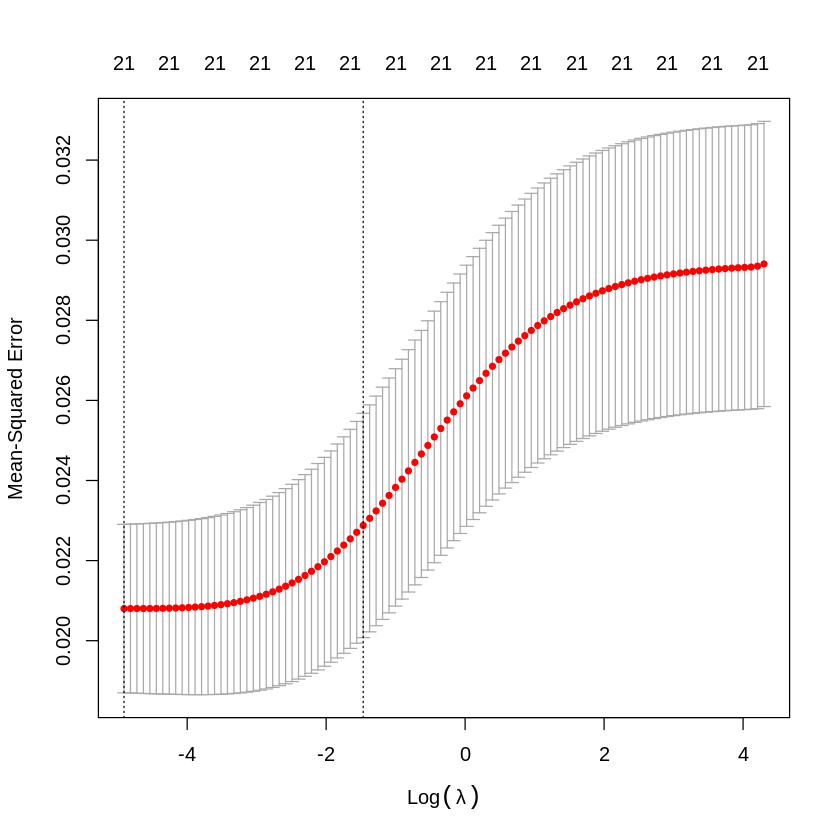

In [180]:
plot(cv.ridge)

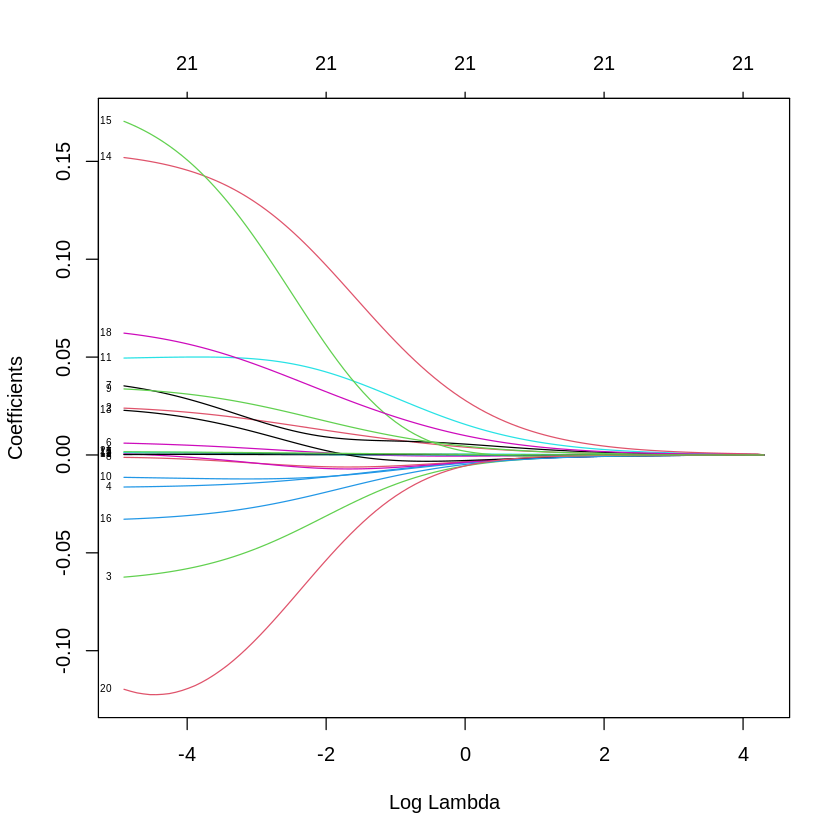

In [181]:
plot(cv.ridge$glmnet.fit, xvar="lambda", label=TRUE)

In [182]:
fit.ridge <- glmnet(train.x, train.y, lambda = cv.ridge$lambda.min, alpha = 0)

In [183]:
pred.ridge <- predict(fit.ridge, test.x, s = cv.ridge$lambda.min)

In [184]:
mean((pred.ridge - test.y)^2)

[1] 0.01722453

In [185]:
set.seed(8)
cv.lasso <- cv.glmnet(train.x, train.y, alpha=1)

In [186]:
cv.lasso$lambda.min

[1] 0.001959983

In [187]:
fit.lasso <- glmnet(train.x, train.y, lambda = cv.lasso$lambda.min, alpha = 1)
pred.lasso <- predict(fit.lasso, test.x, s = cv.lasso$lambda.min)
mean((pred.lasso - test.y)^2)

[1] 0.01713754

In [188]:
coef(cv.lasso, s = cv.lasso$lambda.min)

22 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)        -0.2411373352
Age                 0.0002623301
Female              0.0201688818
On_thyroxine       -0.0583364343
Query_on_thyroxine  .           
On_anti_medi        .           
Sick                .           
Pregnant            0.0140822386
Surgery             .           
I131_treatment      0.0191634821
Query_hypo         -0.0022052350
Query_hyper         0.0452154713
Lithium             .           
Goitre              .           
Tumor               0.1475919023
Hypopituitary       0.0671127887
Psych              -0.0282302732
TSH                 0.0011427902
T3                  0.0609161587
TT4                 .           
T4U                -0.0851853493
FTI                 0.0018385720

In [189]:
train6 <- train5
train6 <- train6^2
test6 <- test5
test6 <- test6^2
train6 <- train6 %>%
  dplyr::select(c(Age, TSH, T3, TT4, T4U, FTI))
test6 <- test6 %>%
  dplyr::select(c(Age, TSH, T3, TT4, T4U, FTI))
str(train6)
str(test6)

'data.frame':	1947 obs. of  6 variables:
 $ Age: num  1681 4900 6400 4356 4624 ...
 $ TSH: num  1.69 0.518 4.84 0.36 5.76 ...
 $ T3 : num  6.25 1.44 0.36 4.84 2.56 ...
 $ TT4: num  15625 3721 6400 15129 6889 ...
 $ T4U: num  1.3 0.757 0.49 0.865 0.792 ...
 $ FTI: num  11881 4900 13225 17424 8649 ...
'data.frame':	696 obs. of  6 variables:
 $ Age: num  3969 625 2809 8464 3600 ...
 $ TSH: num  12.25 21.16 0.0625 0.49 1.44 ...
 $ T3 : num  6.25 5.76 4.41 1.69 6.76 3.24 4.84 1.44 7.84 5.76 ...
 $ TT4: num  11664 3721 21025 14400 13689 ...
 $ T4U: num  0.922 0.672 1.061 0.706 1.716 ...
 $ FTI: num  12769 5625 19881 20449 8100 ...


In [190]:
train.x.2 <- as.matrix(train6)
test.x.2 <- as.matrix(test6)
train.x.3 <- cbind(train.x, train.x.2)
test.x.3 <- cbind(test.x, test.x.2)

In [191]:
set.seed(8)
cv.ridge.2 <- cv.glmnet(train.x.3, train.y, alpha=0)

In [192]:
cv.ridge.2$lambda.min

[1] 0.02699673

In [193]:
fit.ridge.2 <- glmnet(train.x.3, train.y, lambda = cv.ridge.2$lambda.min, alpha = 0)
pred.ridge.2 <- predict(fit.ridge.2, test.x.3, s = cv.ridge.2$lambda.min)
mean((pred.ridge.2 - test.y)^2)

[1] 0.0159811

In [194]:
set.seed(8)
cv.lasso.2 <- cv.glmnet(train.x.3, train.y, alpha=1)

In [195]:
cv.lasso.2$lambda.min

[1] 0.004942395

In [196]:
fit.lasso.2 <- glmnet(train.x.3, train.y, lambda = cv.lasso.2$lambda.min, alpha = 1)
pred.lasso.2 <- predict(fit.lasso.2, test.x.3, s = cv.lasso.2$lambda.min)
mean((pred.lasso.2 - test.y)^2)

[1] 0.01615987

In [197]:
coef(cv.lasso.2, s = cv.lasso.2$lambda.min)

28 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)        -1.186339e-01
Age                 .           
Female              9.207733e-03
On_thyroxine       -4.360906e-02
Query_on_thyroxine  .           
On_anti_medi        .           
Sick                .           
Pregnant            .           
Surgery             .           
I131_treatment      2.606885e-03
Query_hypo          .           
Query_hyper         2.832568e-02
Lithium             .           
Goitre              .           
Tumor               1.377499e-01
Hypopituitary       .           
Psych              -1.142906e-02
TSH                 3.276961e-04
T3                  1.078343e-02
TT4                 .           
T4U                 .           
FTI                 .           
Age                 .           
TSH                 .           
T3                  5.153983e-03
TT4                 .           
T4U                -5.125075e-03
FTI                 7.645193e-06

In [198]:
train7 <- train5
train7 <- train7^3
test7 <- test5
test7 <- test7^3
train7 <- train7 %>%
  dplyr::select(c(Age, TSH, T3, TT4, T4U, FTI))
test7 <- test7 %>%
  dplyr::select(c(Age, TSH, T3, TT4, T4U, FTI))
str(train7)
str(test7)

'data.frame':	1947 obs. of  6 variables:
 $ Age: num  68921 343000 512000 287496 314432 ...
 $ TSH: num  2.197 0.373 10.648 0.216 13.824 ...
 $ T3 : num  15.625 1.728 0.216 10.648 4.096 ...
 $ TT4: num  1953125 226981 512000 1860867 571787 ...
 $ T4U: num  1.482 0.659 0.343 0.804 0.705 ...
 $ FTI: num  1295029 343000 1520875 2299968 804357 ...
'data.frame':	696 obs. of  6 variables:
 $ Age: num  250047 15625 148877 778688 216000 ...
 $ TSH: num  42.875 97.336 0.0156 0.343 1.728 ...
 $ T3 : num  15.62 13.82 9.26 2.2 17.58 ...
 $ TT4: num  1259712 226981 3048625 1728000 1601613 ...
 $ T4U: num  0.885 0.551 1.093 0.593 2.248 ...
 $ FTI: num  1442897 421875 2803221 2924207 729000 ...


In [199]:
train.x.4 <- as.matrix(train7)
test.x.4 <- as.matrix(test7)
train.x.5 <- cbind(train.x.3, train.x.4)
test.x.5 <- cbind(test.x.3, test.x.4)

In [200]:
set.seed(8)
cv.lasso.3 <- cv.glmnet(train.x.5, train.y, alpha=1)

In [201]:
cv.lasso.3$lambda.min

[1] 0.0004008929

In [202]:
fit.lasso.3 <- glmnet(train.x.5, train.y, lambda = cv.lasso.3$lambda.min, alpha = 1)
pred.lasso.3 <- predict(fit.lasso.3, test.x.5, s = cv.lasso.3$lambda.min)
mean((pred.lasso.3 - test.y)^2)

[1] 0.01497228

In [203]:
coef(cv.lasso.3, s = cv.lasso.3$lambda.min)

34 x 1 sparse Matrix of class "dgCMatrix"
                              s1
(Intercept)         1.297314e-01
Age                 4.197042e-04
Female              1.677795e-02
On_thyroxine       -5.663152e-02
Query_on_thyroxine -1.940958e-02
On_anti_medi        2.854745e-03
Sick                1.093757e-02
Pregnant            5.695186e-02
Surgery             .           
I131_treatment      3.913474e-02
Query_hypo         -4.395469e-03
Query_hyper         2.019635e-02
Lithium             4.038956e-03
Goitre              9.498662e-03
Tumor               1.495554e-01
Hypopituitary       5.669843e-02
Psych              -2.011379e-02
TSH                -4.136643e-05
T3                 -4.059268e-02
TT4                 .           
T4U                 .           
FTI                -4.623118e-03
Age                 .           
TSH                 .           
T3                  3.289686e-02
TT4                 3.153957e-06
T4U                -9.182342e-03
FTI                 3.032891e-05
A

In [205]:
# Poly Logit

In [206]:
train9 <- train8
test9 <- test8
train9$Hyper <- factor(train9$Hyper)
test9$Hyper <- factor(test9$Hyper)
logit4 <- glm(Hyper~., data = train9, family = "binomial")
summary(logit4)

Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hyper ~ ., family = "binomial", data = train9)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients:
                     Estimate Std. Error    z value Pr(>|z|)    
(Intercept)         1.087e+16  1.742e+08   62410748   <2e-16 ***
Age                 3.823e+13  5.134e+05   74472142   <2e-16 ***
Female              2.175e+14  3.422e+06   63549964   <2e-16 ***
On_thyroxine       -5.670e+13  5.519e+06  -10272855   <2e-16 ***
Query_on_thyroxine -2.671e+14  1.649e+07  -16196278   <2e-16 ***
On_anti_medi        6.789e+14  1.349e+07   50335490   <2e-16 ***
Sick                2.145e+14  7.362e+06   29130810   <2e-16 ***
Pregnant            1.676e+15  1.419e+07  118129486   <2e-16 ***
Surgery            -6.314e+14  1.369e+07  -46107213   <2e-16 ***
I131_treatment      6.850e+14  1.214e+07   56419606   <2e-16 ***
Query_hypo         -7.525e+14  7.172e+06 -104932409   <2e-16 ***
Query_hyper        -7.987e+13  6.

In [207]:
pred.logit4 <- predict(logit4, newdata = test9, type = "response")

In [208]:
range(pred.logit4)

[1] 2.220446e-16 1.000000e+00

In [209]:
pred.labels4 = ifelse(pred.logit4 > 0.5, 1, 0) 
pred.labels4 = as.factor(pred.labels4)
head(pred.labels4)

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

In [210]:
confusionMatrix(pred.labels4, test9$Hyper)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 673   9
         1   7   7
                                          
               Accuracy : 0.977           
                 95% CI : (0.9629, 0.9868)
    No Information Rate : 0.977           
    P-Value [Acc > NIR] : 0.5660          
                                          
                  Kappa : 0.455           
                                          
 Mcnemar's Test P-Value : 0.8026          
                                          
            Sensitivity : 0.9897          
            Specificity : 0.4375          
         Pos Pred Value : 0.9868          
         Neg Pred Value : 0.5000          
             Prevalence : 0.9770          
         Detection Rate : 0.9670          
   Detection Prevalence : 0.9799          
      Balanced Accuracy : 0.7136          
                                          
       'Positive' Class : 0               
                              

In [211]:
(logit.test.err <- mean(pred.labels4 != test9$Hyper, na.rm = TRUE))

[1] 0.02298851

In [212]:
train10 <- train9
test10 <- test9
train10 <- train10 %>%
  dplyr::select(-c(Agecu, TSHcu, T3cu, TT4cu, T4Ucu, FTIcu))
test10 <- test10 %>%
  dplyr::select(-c(Agecu, TSHcu, T3cu, TT4cu, T4Ucu, FTIcu))
logit5 <- glm(Hyper~., data = train10, family = "binomial")
summary(logit5)

Warning message:
“glm.fit: algorithm did not converge”
Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”



Call:
glm(formula = Hyper ~ ., family = "binomial", data = train10)

Deviance Residuals: 
   Min      1Q  Median      3Q     Max  
 -8.49    0.00    0.00    0.00    8.49  

Coefficients:
                     Estimate Std. Error    z value Pr(>|z|)    
(Intercept)        -8.130e+15  8.309e+07  -97852034   <2e-16 ***
Age                 1.195e+13  1.172e+05  102001594   <2e-16 ***
Female              1.819e+14  3.405e+06   53417588   <2e-16 ***
On_thyroxine       -1.081e+15  5.470e+06 -197599941   <2e-16 ***
Query_on_thyroxine -1.384e+15  1.648e+07  -83983182   <2e-16 ***
On_anti_medi        4.654e+14  1.347e+07   34558978   <2e-16 ***
Sick                1.987e+13  7.347e+06    2704910   <2e-16 ***
Pregnant            3.761e+14  1.416e+07   26565530   <2e-16 ***
Surgery            -1.177e+15  1.368e+07  -86064561   <2e-16 ***
I131_treatment      2.936e+14  1.213e+07   24196042   <2e-16 ***
Query_hypo         -6.556e+14  7.156e+06  -91607716   <2e-16 ***
Query_hyper        -5.675e+13  6

In [213]:
pred.logit5 <- predict(logit5, newdata = test10, type = "response")

In [214]:
pred.labels5 = ifelse(pred.logit5 > 0.5, 1, 0) 
pred.labels5 = as.factor(pred.labels5)
head(pred.labels5)

1 2 3 4 5 6 
0 0 0 0 0 0 
Levels: 0 1

In [215]:
confusionMatrix(pred.labels5, test10$Hyper)

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 668   6
         1  12  10
                                          
               Accuracy : 0.9741          
                 95% CI : (0.9594, 0.9846)
    No Information Rate : 0.977           
    P-Value [Acc > NIR] : 0.7443          
                                          
                  Kappa : 0.5134          
                                          
 Mcnemar's Test P-Value : 0.2386          
                                          
            Sensitivity : 0.9824          
            Specificity : 0.6250          
         Pos Pred Value : 0.9911          
         Neg Pred Value : 0.4545          
             Prevalence : 0.9770          
         Detection Rate : 0.9598          
   Detection Prevalence : 0.9684          
      Balanced Accuracy : 0.8037          
                                          
       'Positive' Class : 0               
                              

In [216]:
(logit.test.err <- mean(pred.labels5 != test10$Hyper, na.rm = TRUE))

[1] 0.02586207

In [218]:
# Trees & RF

In [219]:
set.seed(8)
fit.base.tree <- rpart(Hyper~., data = train3,  method = "class", parm = list(split="gini"),
                      control = list(cp = 0))
fit.base.tree

n= 1947 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1947 59 0 (0.969696970 0.030303030)  
   2) FTI< 173.5 1881 17 0 (0.990962254 0.009037746)  
     4) T3< 3.15 1795  3 0 (0.998328691 0.001671309) *
     5) T3>=3.15 86 14 0 (0.837209302 0.162790698)  
      10) T4U>=1.035 71  5 0 (0.929577465 0.070422535) *
      11) T4U< 1.035 15  6 1 (0.400000000 0.600000000) *
   3) FTI>=173.5 66 24 1 (0.363636364 0.636363636)  
     6) On_thyroxine=1 11  0 0 (1.000000000 0.000000000) *
     7) On_thyroxine=0 55 13 1 (0.236363636 0.763636364)  
      14) TSH>=0.21 7  2 0 (0.714285714 0.285714286) *
      15) TSH< 0.21 48  8 1 (0.166666667 0.833333333) *

In [220]:
grid <- expand.grid(
  minsplit = seq(5, 50, 1),
  maxdepth = seq(2, 10, 1)
)

In [221]:
set.seed(8)
models <- list()
for (i in 1:nrow(grid)) {

  # get the values of minsplit, maxdepth values at row i from the grid data frame
  ms <- grid$minsplit[i]
  md <- grid$maxdepth[i]
  # train a model and store in the list

  models[[i]] <- rpart(
    formula = Hyper ~ .,
    data   = train3,
    method  = "class",
    control = list(minsplit = ms, maxdepth = md)
    )
}

In [222]:
# function to get optimal cp
get_cp <- function(x) {
  min    <- which.min(x$cptable[, "xerror"])
  cp <- x$cptable[min, "CP"] 
}

# function to get minimum error
get_min_error <- function(x) {
  min    <- which.min(x$cptable[, "xerror"])
  xerror <- x$cptable[min, "xerror"] 
}

grid %>%
  mutate(
    cp    = purrr::map_dbl(models, get_cp), # The map_dbl functions transform their
    #input by applying a function to each element and return vectors of the corresponding type.
    error = purrr::map_dbl(models, get_min_error)
    ) %>%
  arrange(error) %>%
  top_n(3, wt = error) # To take to top 3 combinations
# (38,2) and (32,5)

minsplit,maxdepth,cp,error
<dbl>,<dbl>,<dbl>,<dbl>
38,2,0.01000000,0.5932203
11,3,0.05084746,0.5932203
32,3,0.05084746,0.5932203
37,3,0.05084746,0.5932203
43,3,0.05084746,0.5932203
9,4,0.05084746,0.5932203
13,4,0.05084746,0.5932203
17,4,0.05084746,0.5932203
26,4,0.05084746,0.5932203


In [223]:
set.seed(8)
fit.optimal.tree1 <- rpart(
    formula = Hyper ~ .,
    data    = train3,
    method  = "class",
    control = list(minsplit = 38, maxdepth = 2, cp = .01)
    )
fit.optimal.tree1

n= 1947 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

1) root 1947 59 0 (0.969696970 0.030303030)  
  2) FTI< 173.5 1881 17 0 (0.990962254 0.009037746) *
  3) FTI>=173.5 66 24 1 (0.363636364 0.636363636)  
    6) On_thyroxine=1 11  0 0 (1.000000000 0.000000000) *
    7) On_thyroxine=0 55 13 1 (0.236363636 0.763636364) *

In [224]:
set.seed(8)
fit.optimal.tree2 <- rpart(
    formula = Hyper ~ .,
    data    = train3,
    method  = "class",
    control = list(minsplit = 32, maxdepth = 5, cp = .01)
    )
fit.optimal.tree2

n= 1947 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1947 59 0 (0.969696970 0.030303030)  
   2) FTI< 173.5 1881 17 0 (0.990962254 0.009037746)  
     4) T3< 3.15 1795  3 0 (0.998328691 0.001671309) *
     5) T3>=3.15 86 14 0 (0.837209302 0.162790698)  
      10) T4U>=1.035 71  5 0 (0.929577465 0.070422535) *
      11) T4U< 1.035 15  6 1 (0.400000000 0.600000000) *
   3) FTI>=173.5 66 24 1 (0.363636364 0.636363636)  
     6) On_thyroxine=1 11  0 0 (1.000000000 0.000000000) *
     7) On_thyroxine=0 55 13 1 (0.236363636 0.763636364)  
      14) TSH>=0.21 7  2 0 (0.714285714 0.285714286) *
      15) TSH< 0.21 48  8 1 (0.166666667 0.833333333) *

In [225]:
#Train error for fit.base.tree
predictions.dt.train.base <- predict(fit.base.tree, type = "class")
train.err.base <- mean(predictions.dt.train.base != train3$Hyper)
#Train error for fit.optimal.tree
predictions.dt.train.optimal <- predict(fit.optimal.tree1, type = "class")
train.err.optimal <- mean(predictions.dt.train.optimal != train3$Hyper)

#Test error for fit.base.tree
predictions.dt.test.base <- predict(fit.base.tree, newdata = test3, type = "class")
test.err.base <- mean(predictions.dt.test.base != test3$Hyper)
#Train error for fit.optimal.tree
predictions.dt.test.optimal <- predict(fit.optimal.tree1, newdata = test3, type = "class")
test.err.optimal <- mean(predictions.dt.test.optimal != test3$Hyper)

compare <- data.frame(Train_Error_Base = train.err.base,
            Test_Error_Base = test.err.base,
            Train_Error_Optimal = train.err.optimal,
            Test_Error_Optimal = test.err.optimal)

compare

Train_Error_Base,Test_Error_Base,Train_Error_Optimal,Test_Error_Optimal
<dbl>,<dbl>,<dbl>,<dbl>
0.01232666,0.01724138,0.01540832,0.01867816


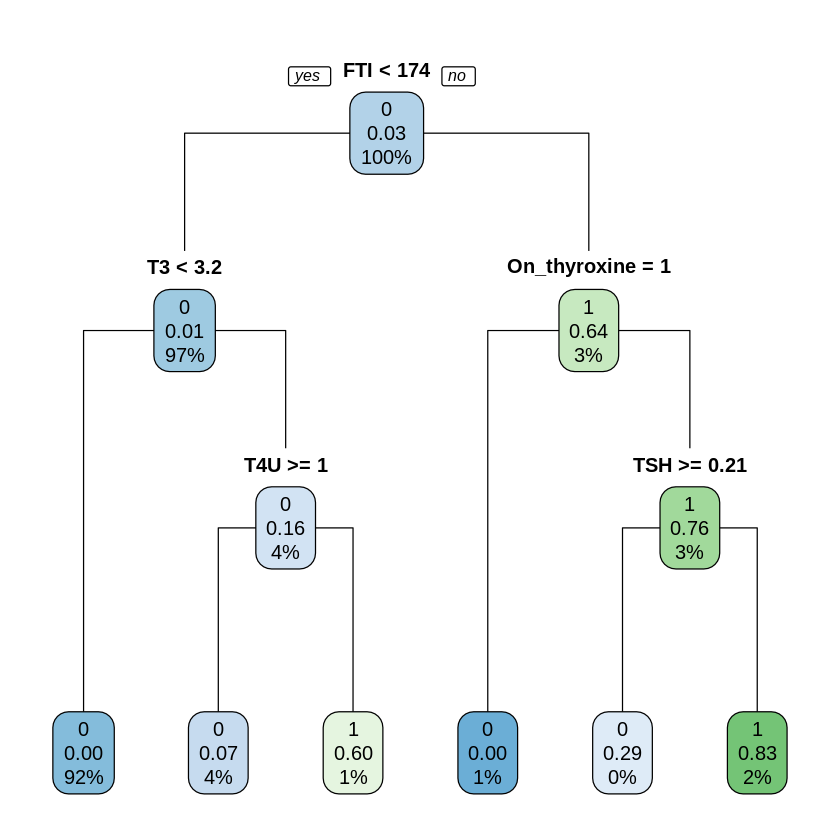

In [226]:
rpart.plot(fit.base.tree, type = 1)

In [227]:
set.seed(8)
fit.base.tree.post <- rpart(Hyper~., data = train3,  method = "class", parm= list(split="gini"), control = list(cp = 0))
fit.base.tree.post

n= 1947 

node), split, n, loss, yval, (yprob)
      * denotes terminal node

 1) root 1947 59 0 (0.969696970 0.030303030)  
   2) FTI< 173.5 1881 17 0 (0.990962254 0.009037746)  
     4) T3< 3.15 1795  3 0 (0.998328691 0.001671309) *
     5) T3>=3.15 86 14 0 (0.837209302 0.162790698)  
      10) T4U>=1.035 71  5 0 (0.929577465 0.070422535) *
      11) T4U< 1.035 15  6 1 (0.400000000 0.600000000) *
   3) FTI>=173.5 66 24 1 (0.363636364 0.636363636)  
     6) On_thyroxine=1 11  0 0 (1.000000000 0.000000000) *
     7) On_thyroxine=0 55 13 1 (0.236363636 0.763636364)  
      14) TSH>=0.21 7  2 0 (0.714285714 0.285714286) *
      15) TSH< 0.21 48  8 1 (0.166666667 0.833333333) *

In [228]:
printcp(fit.base.tree.post)


Classification tree:
rpart(formula = Hyper ~ ., data = train3, method = "class", parms = list(split = "gini"), 
    control = list(cp = 0))

Variables actually used in tree construction:
[1] FTI          On_thyroxine T3           T4U          TSH         

Root node error: 59/1947 = 0.030303

n= 1947 

        CP nsplit rel error  xerror     xstd
1 0.305085      0   1.00000 1.00000 0.128201
2 0.186441      1   0.69492 0.81356 0.115971
3 0.050847      2   0.50847 0.50847 0.092116
4 0.025424      3   0.45763 0.59322 0.099367
5 0.000000      5   0.40678 0.66102 0.104782


In [229]:
tree.pruned <- prune(fit.base.tree.post, cp = 0.050847)

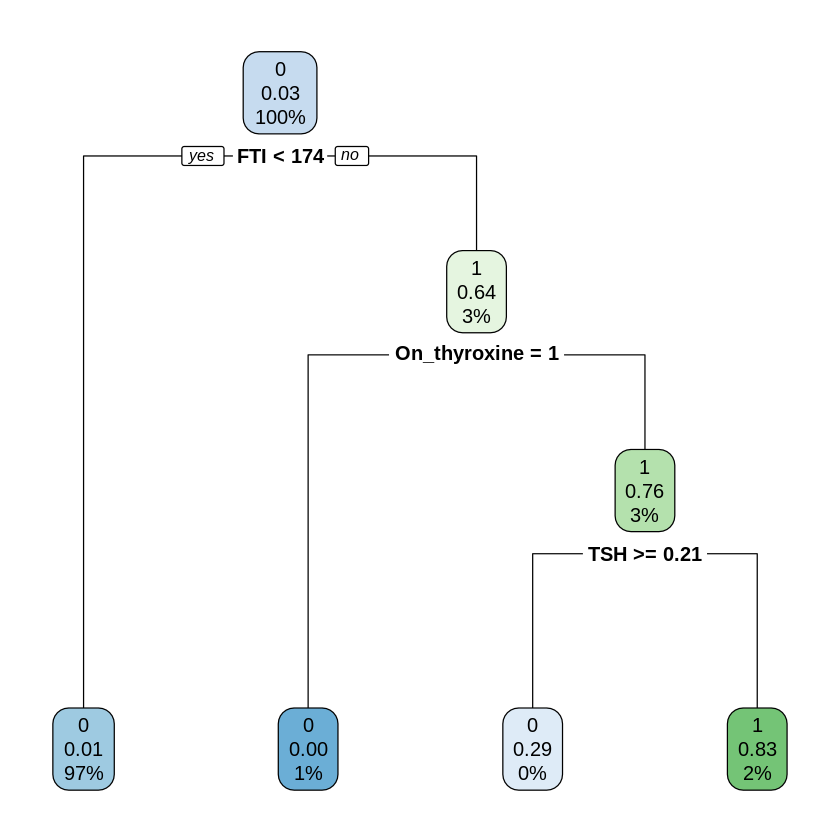

In [230]:
rpart.plot(tree.pruned)

In [232]:
train_x <- train3 %>% dplyr::select(-Hyper)
train_y <- train3$Hyper

mtry = 4  OOB error = 1.44% 
Searching left ...
mtry = 2 	OOB error = 1.85% 
-0.2857143 0.05 
Searching right ...
mtry = 8 	OOB error = 1.28% 
0.1071429 0.05 
mtry = 16 	OOB error = 1.49% 
-0.16 0.05 


,mtry,OOBError
2.OOB,2,0.01848998
4.OOB,4,0.01438110
8.OOB,8,0.01284027
16.OOB,16,0.01489471


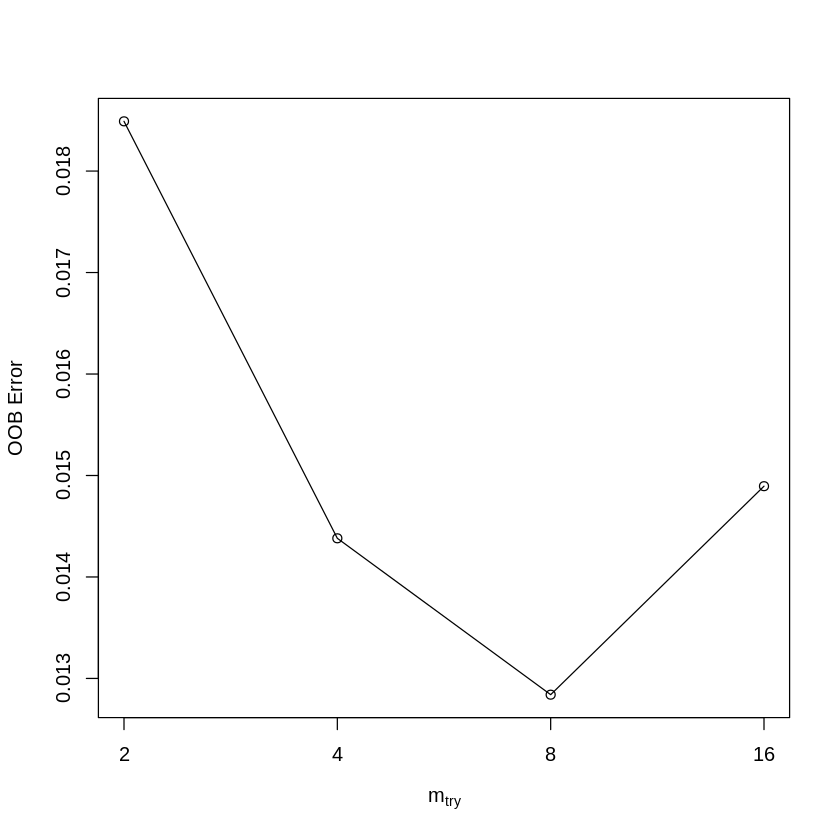

In [233]:
set.seed(8)
tuneRF(train_x, train_y, ntreeTry = 100)

In [234]:
set.seed(8)
fit.rf <- randomForest(Hyper~., data = train3, ntree = 100, mtry = 8)
fit.rf


Call:
 randomForest(formula = Hyper ~ ., data = train3, ntree = 100,      mtry = 8) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 8

        OOB estimate of  error rate: 1.44%
Confusion matrix:
     0  1 class.error
0 1878 10  0.00529661
1   18 41  0.30508475

In [235]:
predictions.rf <- predict(fit.rf, newdata = test3, type = "class")
confusion.matrix.rf <- confusionMatrix(predictions.rf, test3$Hyper)
1 - confusion.matrix.rf$overall[["Accuracy"]]

[1] 0.01436782

mtry = 5  OOB error = 1.8% 
Searching left ...
mtry = 3 	OOB error = 1.69% 
0.05714286 0.05 
mtry = 2 	OOB error = 1.9% 
-0.1212121 0.05 
Searching right ...
mtry = 10 	OOB error = 1.49% 
0.1212121 0.05 
mtry = 20 	OOB error = 1.49% 
0 0.05 


,mtry,OOBError
2.OOB,2,0.01900360
3.OOB,3,0.01694915
5.OOB,5,0.01797637
10.OOB,10,0.01489471
20.OOB,20,0.01489471


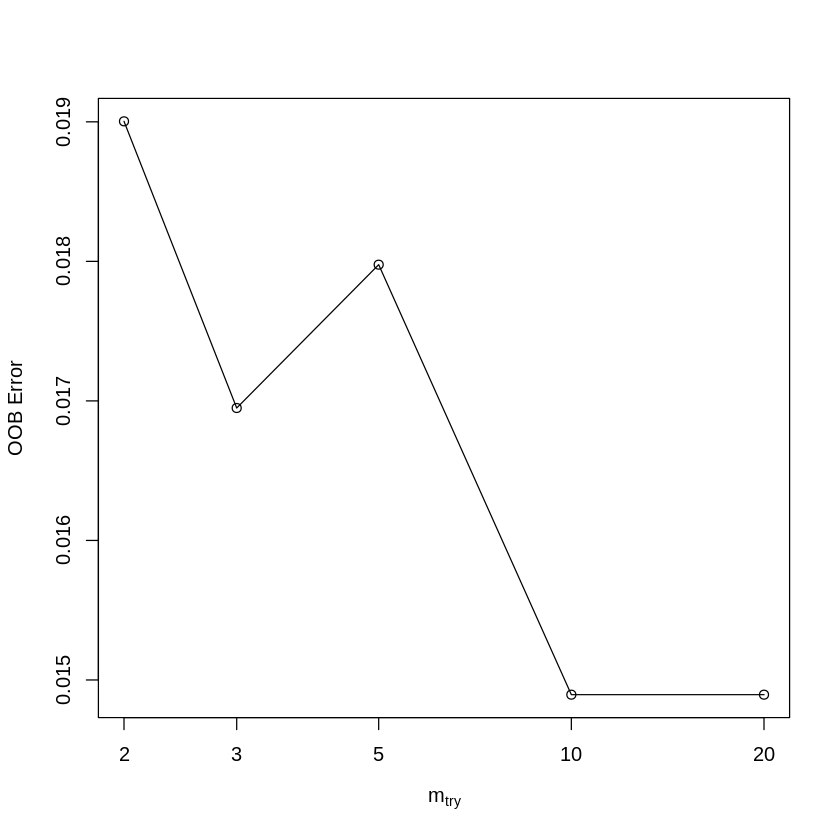

In [251]:
x <- train9 %>% dplyr::select(-Hyper)
y <- train9$Hyper
set.seed(8)
tuneRF(x, y, ntreeTry = 100)

In [253]:
str(x)

tibble [1,947 × 33] (S3: tbl_df/tbl/data.frame)
 $ Age               : num [1:1947] 41 70 80 66 68 84 71 59 28 63 ...
 $ Female            : num [1:1947] 1 1 1 1 0 1 1 1 0 1 ...
 $ On_thyroxine      : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_on_thyroxine: num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ On_anti_medi      : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Sick              : num [1:1947] 0 0 0 0 0 0 1 0 0 0 ...
 $ Pregnant          : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Surgery           : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ I131_treatment    : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hypo        : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Query_hyper       : num [1:1947] 0 0 0 0 0 0 1 0 0 0 ...
 $ Lithium           : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Goitre            : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Tumor             : num [1:1947] 0 0 0 1 0 1 0 0 0 0 ...
 $ Hypopituitary     : num [1:1947] 0 0 0 0 0 0 0 0 0 0 ...
 $ Psych             : num [1:1947] 0 0 0 

In [254]:
set.seed(8)
fit.rf2 <- randomForest(Hyper~Female+On_thyroxine+I131_treatment+Query_hyper+Tumor+Psych+TSH+T3+T3sq+T4Usq+FTIsq, data = train9, ntree = 100, mtry = 10)
fit.rf2


Call:
 randomForest(formula = Hyper ~ Female + On_thyroxine + I131_treatment +      Query_hyper + Tumor + Psych + TSH + T3 + T3sq + T4Usq + FTIsq,      data = train9, ntree = 100, mtry = 10) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 10

        OOB estimate of  error rate: 1.54%
Confusion matrix:
     0  1 class.error
0 1874 14 0.007415254
1   16 43 0.271186441

In [255]:
predictions.rf2 <- predict(fit.rf2, newdata = test9, type = "class")
confusion.matrix.rf2 <- confusionMatrix(predictions.rf2, test9$Hyper)
1 - confusion.matrix.rf2$overall[["Accuracy"]]

[1] 0.01293103

In [237]:
# SVM

In [238]:
set.seed(8)
fit.tuned <- tune(svm, Hyper~.,data = train3, kernel = "radial", ranges = list(cost = c(.001, .01,0.1,1,10,100,1000,10000),gamma=c(0.01,0.1, 0.25, 0.5,1,2,3,4)))

In [239]:
fit.tuned$best.parameters

,cost,gamma
,<dbl>,<dbl>
7,1000,0.01


In [240]:
fit.svm <- svm(Hyper~., data = train3, kernel = "radial", cost = 1000, gamma = 0.01)
summary(fit.svm)


Call:
svm(formula = Hyper ~ ., data = train3, kernel = "radial", cost = 1000, 
    gamma = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  1000 

Number of Support Vectors:  78

 ( 44 34 )


Number of Classes:  2 

Levels: 
 0 1




In [241]:
pred.svm <- predict(fit.svm, test3)
mean(pred.svm != test3$Hyper)

[1] 0.01436782

In [257]:
set.seed(8)
fit.tuned2 <- tune(svm, Hyper~Female+On_thyroxine+I131_treatment+Query_hyper+Tumor+Psych+TSH+T3+T3sq+T4Usq+FTIsq,data = train9, kernel = "radial", ranges = list(cost = c(.001, .01,0.1,1,10,100,1000,10000),gamma=c(0.01,0.1, 0.25, 0.5,1,2,3,4)))

In [258]:
fit.tuned2$best.parameters

,cost,gamma
,<dbl>,<dbl>
6,100,0.01


In [259]:
fit.svm2 <- svm(Hyper~Female+On_thyroxine+I131_treatment+Query_hyper+Tumor+Psych+TSH+T3+T3sq+T4Usq+FTIsq, data = train9, kernel = "radial", cost = 100, gamma = 0.01)
summary(fit.svm2)


Call:
svm(formula = Hyper ~ Female + On_thyroxine + I131_treatment + Query_hyper + 
    Tumor + Psych + TSH + T3 + T3sq + T4Usq + FTIsq, data = train9, 
    kernel = "radial", cost = 100, gamma = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  radial 
       cost:  100 

Number of Support Vectors:  91

 ( 50 41 )


Number of Classes:  2 

Levels: 
 0 1




In [260]:
pred.svm2 <- predict(fit.svm2, test9)
mean(pred.svm2 != test9$Hyper)

[1] 0.0158046

In [261]:
set.seed(8)
fit.tuned3 <- tune(svm, Hyper~.,data = train3, kernel = "linear", ranges = list(cost = c(.001, .01,0.1,1,10,100,1000,10000),gamma=c(0.01,0.1, 0.25, 0.5,1,2,3,4)))

In [243]:
fit.tuned2$best.parameters

,cost,gamma
,<dbl>,<dbl>
5,10,0.01


In [244]:
fit.svm3 <- svm(Hyper~., data = train3, kernel = "linear", cost = 10, gamma = 0.01)
summary(fit.svm3)


Call:
svm(formula = Hyper ~ ., data = train3, kernel = "linear", cost = 10, 
    gamma = 0.01)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  10 

Number of Support Vectors:  90

 ( 49 41 )


Number of Classes:  2 

Levels: 
 0 1




In [245]:
pred.svm3 <- predict(fit.svm3, test3)
mean(pred.svm3 != test3$Hyper)

[1] 0.01867816